# IMPORT PYTHON LIBRARIES

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

### Loading the Dataset

In [4]:
app_data = pd.read_csv('application_data.csv')
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
prev_app = pd.read_csv('previous_application.csv')
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### Understanding the Dataset

In [7]:
app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [8]:
# To suppress scientific notation in Pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [9]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307499.00000,307233.00000,307511.00000,307511.00000,307511.00000,...,307511.00000,307511.00000,307511.00000,307511.00000,265992.00000,265992.00000,265992.00000,265992.00000,265992.00000,265992.00000
mean,278180.51858,0.08073,0.41705,168797.91930,599025.99971,27108.57391,538396.20743,0.02087,-16036.99507,63815.04590,...,0.00813,0.00060,0.00051,0.00033,0.00640,0.00700,0.03436,0.26740,0.26547,1.89997
std,102790.17535,0.27242,0.72212,237123.14628,402490.77700,14493.73732,369446.46054,0.01383,4363.98863,141275.76652,...,0.08980,0.02439,0.02252,0.01830,0.08385,0.11076,0.20468,0.91600,0.79406,1.86929
min,100002.00000,0.00000,0.00000,25650.00000,45000.00000,1615.50000,40500.00000,0.00029,-25229.00000,-17912.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,189145.50000,0.00000,0.00000,112500.00000,270000.00000,16524.00000,238500.00000,0.01001,-19682.00000,-2760.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,278202.00000,0.00000,0.00000,147150.00000,513531.00000,24903.00000,450000.00000,0.01885,-15750.00000,-1213.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
75%,367142.50000,0.00000,1.00000,202500.00000,808650.00000,34596.00000,679500.00000,0.02866,-12413.00000,-289.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3.00000
max,456255.00000,1.00000,19.00000,117000000.00000,4050000.00000,258025.50000,4050000.00000,0.07251,-7489.00000,365243.00000,...,1.00000,1.00000,1.00000,1.00000,4.00000,9.00000,8.00000,27.00000,261.00000,25.00000


# Data Cleaning
### Cleaning of app_data
- Calculate the null% in app_data Dataset

In [11]:
msng_info_1 = pd.DataFrame(app_data.isnull().sum().sort_values()).reset_index()
msng_info_1.rename(columns = {'index' : 'col_name',0:'null_count'}, inplace=True)
msng_info_1.head()

,col_name,null_count
0,SK_ID_CURR,0
1,HOUR_APPR_PROCESS_START,0
2,REG_REGION_NOT_WORK_REGION,0
3,LIVE_REGION_NOT_WORK_REGION,0
4,REG_CITY_NOT_LIVE_CITY,0


In [12]:
## Calculating missing Percentage(%)
msng_info_1['msng_pct'] = msng_info_1['null_count']/app_data.shape[0]*100 ## msng_pct = Misssing Percentage

msng_info_1

,col_name,null_count,msng_pct
0,SK_ID_CURR,0,0.00000
1,HOUR_APPR_PROCESS_START,0,0.00000
2,REG_REGION_NOT_WORK_REGION,0,0.00000
3,LIVE_REGION_NOT_WORK_REGION,0,0.00000
4,REG_CITY_NOT_LIVE_CITY,0,0.00000
...,...,...,...
117,NONLIVINGAPARTMENTS_MEDI,213514,69.43296
118,NONLIVINGAPARTMENTS_MODE,213514,69.43296
119,COMMONAREA_MODE,214865,69.87230
120,COMMONAREA_AVG,214865,69.87230


## Dropping the NUll column and storing in new variable
- Total of 49 column have been dropped.
- All of the 49 column are having more than 40% of the null value.

In [14]:
msng_col_1 = msng_info_1[msng_info_1['msng_pct']>=40]['col_name'].to_list()
app_data_new= app_data.drop(labels=msng_col_1,axis=1)
app_data_new.shape

(307511, 73)

In [15]:
len(msng_col_1)

49

In [16]:
app_data_new

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00000,406597.50000,24700.50000,...,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
1,100003,0,Cash loans,F,N,N,0,270000.00000,1293502.50000,35698.50000,...,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,100004,0,Revolving loans,M,Y,Y,0,67500.00000,135000.00000,6750.00000,...,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,100006,0,Cash loans,F,N,Y,0,135000.00000,312682.50000,29686.50000,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.00000,513000.00000,21865.50000,...,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.00000,254700.00000,27558.00000,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.00000,269550.00000,12001.50000,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.00000,677664.00000,29979.00000,...,0,0,0,0,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000
307509,456254,1,Cash loans,F,N,Y,0,171000.00000,370107.00000,20205.00000,...,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


## Cleaning of prev_app

In [18]:
msng_info_2 = pd.DataFrame(prev_app.isnull().sum().sort_values()).reset_index()
msng_info_2.rename(columns = {'index' : 'col_name',0:'null_count'}, inplace=True)
msng_info_2.head()

,col_name,null_count
0,SK_ID_PREV,0
1,NAME_YIELD_GROUP,0
2,NAME_SELLER_INDUSTRY,0
3,SELLERPLACE_AREA,0
4,CHANNEL_TYPE,0


In [19]:
len(msng_info_2)

37

In [20]:
## Calculating missing Percentage(%)
msng_info_2['msng_pct'] = msng_info_2['null_count']/prev_app.shape[0]*100  ## msng_pct = Misssing Percentage
msng_info_2

,col_name,null_count,msng_pct
0,SK_ID_PREV,0,0.00000
1,NAME_YIELD_GROUP,0,0.00000
2,NAME_SELLER_INDUSTRY,0,0.00000
3,SELLERPLACE_AREA,0,0.00000
4,CHANNEL_TYPE,0,0.00000
5,NAME_PRODUCT_TYPE,0,0.00000
6,NAME_PORTFOLIO,0,0.00000
7,NAME_GOODS_CATEGORY,0,0.00000
8,NAME_CLIENT_TYPE,0,0.00000
9,CODE_REJECT_REASON,0,0.00000


## Dropping the null column and storing in new variable

In [22]:
msng_col_2 = msng_info_2[msng_info_2['msng_pct']>=40]['col_name'].to_list()
prev_app_new= prev_app.drop(labels=msng_col_2,axis=1)
prev_app_new.shape

(1670214, 26)

In [23]:
prev_app_new

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.43000,17145.00000,17145.00000,17145.00000,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00000,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.61500,607500.00000,679671.00000,607500.00000,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00000,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.73500,112500.00000,136444.50000,112500.00000,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00000,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.33500,450000.00000,470790.00000,450000.00000,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00000,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.39500,337500.00000,404055.00000,337500.00000,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00000,high,Cash Street: high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.29000,267295.50000,311400.00000,267295.50000,WEDNESDAY,12,Y,...,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.00000,low_normal,POS industry with interest
1670210,2357031,334635,Consumer loans,6622.02000,87750.00000,64291.50000,87750.00000,TUESDAY,15,Y,...,New,Furniture,POS,XNA,Stone,43,Furniture,12.00000,middle,POS industry with interest
1670211,2659632,249544,Consumer loans,11520.85500,105237.00000,102523.50000,105237.00000,MONDAY,12,Y,...,Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.00000,low_normal,POS household with interest
1670212,2785582,400317,Cash loans,18821.52000,180000.00000,191880.00000,180000.00000,WEDNESDAY,9,Y,...,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.00000,low_normal,Cash X-Sell: low


# Imputing Missing value

#### IN app_data_new DATASET
- Checking the columns after removing high missing values(>=40%)

In [26]:
(app_data_new.isnull().sum() / len(app_data_new) *100).sort_values()

SK_ID_CURR                     0.00000
HOUR_APPR_PROCESS_START        0.00000
REG_REGION_NOT_LIVE_REGION     0.00000
REG_REGION_NOT_WORK_REGION     0.00000
LIVE_REGION_NOT_WORK_REGION    0.00000
                                ...   
AMT_REQ_CREDIT_BUREAU_WEEK    13.50163
AMT_REQ_CREDIT_BUREAU_MON     13.50163
AMT_REQ_CREDIT_BUREAU_YEAR    13.50163
EXT_SOURCE_3                  19.82531
OCCUPATION_TYPE               31.34555
Length: 73, dtype: float64

### Checking correlation of EXT_SOURCE_XX columns vs TARGET column
- #### We can see that there is no correlation between EXT_SOURCE  and TARGET column

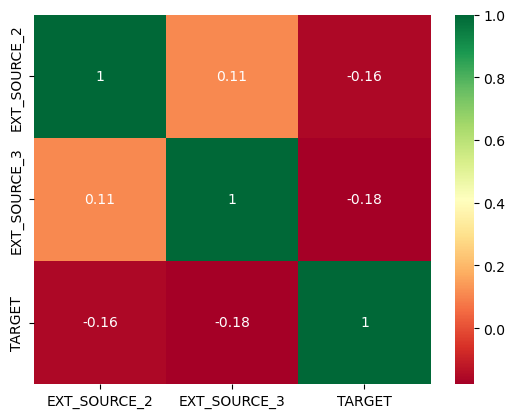

In [28]:
EXT_SOURCE_X = app_data_new[["EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
EXT_SOURCE_X_corr = EXT_SOURCE_X.corr()
ax = sns.heatmap(EXT_SOURCE_X_corr,
            xticklabels=EXT_SOURCE_X_corr.columns,
            yticklabels=EXT_SOURCE_X_corr.columns,annot = True,cmap ="RdYlGn")

### Checking correlation of AMT_REQ_CREDIT_XX columns vs TARGET column

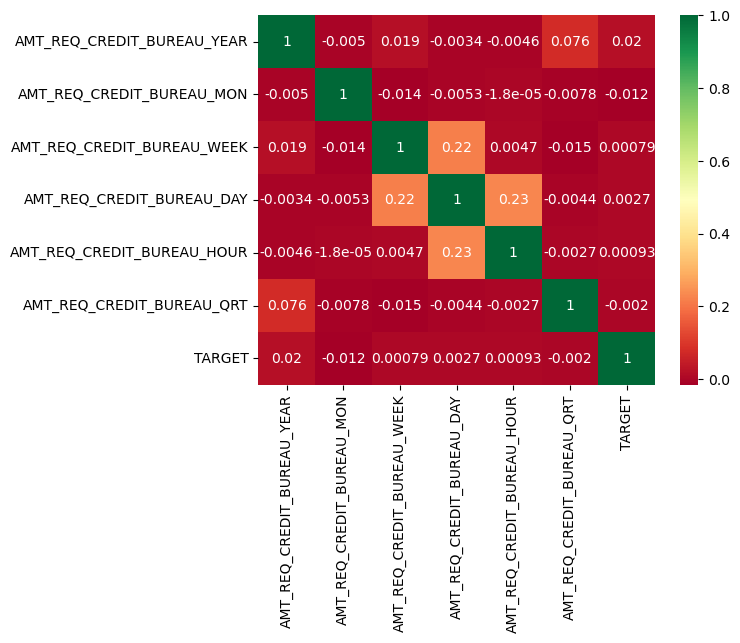

In [30]:
AMT_REQ_CREDIT = app_data_new[[
    "AMT_REQ_CREDIT_BUREAU_YEAR", "AMT_REQ_CREDIT_BUREAU_MON",
    "AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR",
    "AMT_REQ_CREDIT_BUREAU_QRT", "TARGET"
]]
AMT_REQ_CREDIT_corr = AMT_REQ_CREDIT.corr()
ab = sns.heatmap(AMT_REQ_CREDIT_corr,
                 xticklabels=AMT_REQ_CREDIT_corr.columns,
                 yticklabels=AMT_REQ_CREDIT_corr.columns,annot=True,cmap="RdYlGn")

- ## Their is no correlation between AMT_REQ_CREDIT_XXX AND TARGET column.
  

# 

## DATA IMPUTATION 
- # For app_data_new dataset

### OCCUPATION_TYPE
- #### 'OCCUPATION_TYPE' has higher null percentage(31.35%) hence We will impute it with a new category as assigning 
- #### to any existing category might influence the analysis.

In [35]:
app_data_new['OCCUPATION_TYPE'].fillna(value="Missing", inplace=True)

In [36]:
app_data_new['OCCUPATION_TYPE']


0            Laborers
1          Core staff
2            Laborers
3            Laborers
4          Core staff
             ...     
307506    Sales staff
307507        Missing
307508       Managers
307509       Laborers
307510       Laborers
Name: OCCUPATION_TYPE, Length: 307511, dtype: object

### Ext_Source3
- #### There is almost no correlation between Ext_Source3 and Target, it has 19.8% nulls value. 
- #### Therefore imputing with median wont cause any issue with our analysis.

In [38]:
app_data_new['EXT_SOURCE_3'].fillna(app_data_new['EXT_SOURCE_3'].median(), inplace=True)

In [39]:
app_data_new['EXT_SOURCE_3']
# There is almost no correlation between Ext_Source3 and Target, it has 19.8% nulls value. 
# Therefore imputing with median wont cause any issue with our analysis.

0        0.13938
1        0.53528
2        0.72957
3        0.53528
4        0.53528
           ...  
307506   0.53528
307507   0.53528
307508   0.21886
307509   0.66102
307510   0.11392
Name: EXT_SOURCE_3, Length: 307511, dtype: float64

### AMT_REQ_CREDIT_XX
- #### Imputing columns with 13% missing values with Mode,
- #### replacing missing values with the most frequent value would make more sense.

In [41]:
app_data_new['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(
    value=app_data_new['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0],inplace=True)
app_data_new['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(
    value=app_data_new['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0],inplace=True)
app_data_new['AMT_REQ_CREDIT_BUREAU_MON'].fillna(
    value=app_data_new['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0],inplace=True)
app_data_new['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(
    value=app_data_new['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0],inplace=True)
app_data_new['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(
    value=app_data_new['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0],inplace=True)
app_data_new['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(
    value=app_data_new['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0],inplace=True)

### NAME_TYPE_SUITE
- #### This column is an object category, consist of 0.42% null values.
- #### Hence,imputing with with the most frequent category using mode() would make sense

In [43]:
app_data_new['NAME_TYPE_SUITE'].fillna(value=app_data_new['NAME_TYPE_SUITE'].mode()[0], inplace=True)

### OBS_30 & DEF_30 
- #### imputing data for columns which has less than 1% of null values with median.

In [45]:
app_data_new['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(
    value=app_data_new['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)
app_data_new['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(
    value=app_data_new['DEF_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)
app_data_new['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(
    value=app_data_new['OBS_60_CNT_SOCIAL_CIRCLE'].median(), inplace=True)
app_data_new['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(
    value=app_data_new['DEF_60_CNT_SOCIAL_CIRCLE'].median(), inplace=True)
app_data_new['EXT_SOURCE_2'].fillna(
    value=app_data_new['EXT_SOURCE_2'].median(), inplace=True)
app_data_new['AMT_GOODS_PRICE'].fillna(
    value=app_data_new['AMT_GOODS_PRICE'].median(), inplace=True)
app_data_new['AMT_ANNUITY'].fillna(
    value=app_data_new['AMT_ANNUITY'].median(), inplace=True)
app_data_new['CNT_FAM_MEMBERS'].fillna(
    value=app_data_new['CNT_FAM_MEMBERS'].median(), inplace=True)
app_data_new['DAYS_LAST_PHONE_CHANGE'].fillna(
    value=app_data_new['DAYS_LAST_PHONE_CHANGE'].median(), inplace=True)

### Checking NULL value  in app_data_new dataset. After Imputing, NO NULL Value Found

In [47]:
(app_data_new.isnull().sum()/len(app_data_new)*100).sort_values()

SK_ID_CURR                    0.00000
FLAG_DOCUMENT_6               0.00000
FLAG_DOCUMENT_5               0.00000
FLAG_DOCUMENT_4               0.00000
FLAG_DOCUMENT_3               0.00000
                                ...  
FLAG_MOBIL                    0.00000
DAYS_ID_PUBLISH               0.00000
DAYS_REGISTRATION             0.00000
LIVE_REGION_NOT_WORK_REGION   0.00000
AMT_REQ_CREDIT_BUREAU_YEAR    0.00000
Length: 73, dtype: float64

#

# Impute Null Value In Previous_application Dataset

In [50]:
round(prev_app_new.isnull().sum() / prev_app_new.shape[0] * 100.00,2).sort_values(ascending=False)

AMT_GOODS_PRICE               23.08000
AMT_ANNUITY                   22.29000
CNT_PAYMENT                   22.29000
PRODUCT_COMBINATION            0.02000
NAME_PAYMENT_TYPE              0.00000
NAME_YIELD_GROUP               0.00000
NAME_SELLER_INDUSTRY           0.00000
SELLERPLACE_AREA               0.00000
CHANNEL_TYPE                   0.00000
NAME_PRODUCT_TYPE              0.00000
NAME_PORTFOLIO                 0.00000
NAME_GOODS_CATEGORY            0.00000
NAME_CLIENT_TYPE               0.00000
CODE_REJECT_REASON             0.00000
SK_ID_PREV                     0.00000
SK_ID_CURR                     0.00000
NAME_CONTRACT_STATUS           0.00000
NAME_CASH_LOAN_PURPOSE         0.00000
NFLAG_LAST_APPL_IN_DAY         0.00000
FLAG_LAST_APPL_PER_CONTRACT    0.00000
HOUR_APPR_PROCESS_START        0.00000
WEEKDAY_APPR_PROCESS_START     0.00000
AMT_CREDIT                     0.00000
AMT_APPLICATION                0.00000
NAME_CONTRACT_TYPE             0.00000
DAYS_DECISION            

### AMT_ANNUITY
- #### The AMT_ANNUITY distribution is right-skewed, with most values concentrated near zero and a long tail extending to higher amounts.

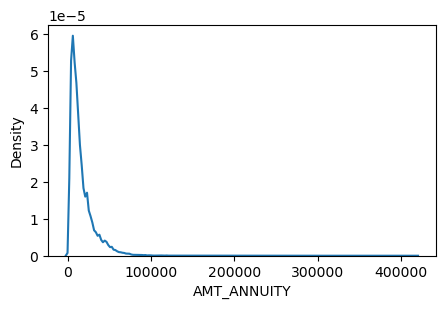

In [52]:
plt.figure(figsize=(5,3))
sns.kdeplot(prev_app_new['AMT_ANNUITY'])
plt.show()

- #### Imputing AMT_ANNUITY column with median as the distribution is greatly skewed.

In [54]:
prev_app_new['AMT_ANNUITY'].fillna(prev_app_new['AMT_ANNUITY'].median(),inplace = True)

In [55]:
prev_app_new['AMT_ANNUITY'].describe()

count   1670214.00000
mean      14906.50618
std       13177.51410
min           0.00000
25%        7547.09625
50%       11250.00000
75%       16824.02625
max      418058.14500
Name: AMT_ANNUITY, dtype: float64

### AMT_GOODS_PRICE
- #### The AMT_GOODS_PRICE distribution is right-skewed, with most values concentrated near the lower range and a long tail extending to higher prices. 

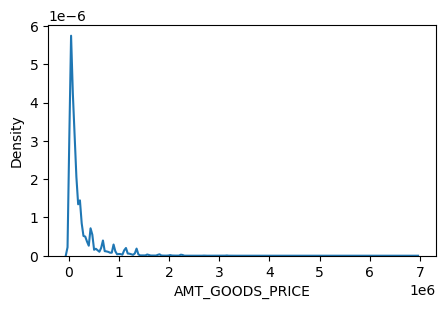

In [57]:
plt.figure(figsize=(5,3))
sns.kdeplot(prev_app_new['AMT_GOODS_PRICE'][pd.notnull(prev_app_new['AMT_GOODS_PRICE'])])
plt.show()

### visualize graphs for mode, mean and median and see if the distribution is still about the same.

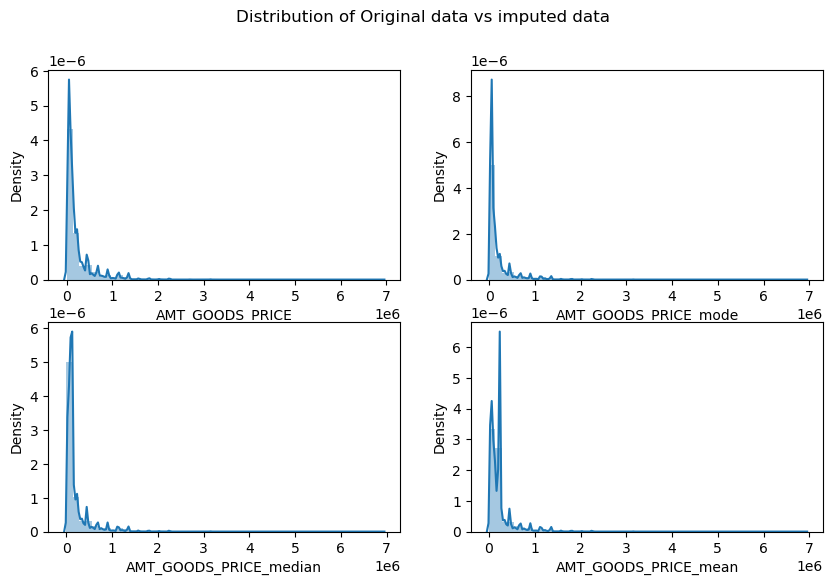

In [59]:
AMT_GOODS_PRICE_DF = pd.DataFrame() # new dataframe with columns imputed with mode, median and mean
AMT_GOODS_PRICE_DF['AMT_GOODS_PRICE_mode'] = prev_app_new['AMT_GOODS_PRICE'].fillna(prev_app_new['AMT_GOODS_PRICE'].mode()[0])
AMT_GOODS_PRICE_DF['AMT_GOODS_PRICE_median'] =prev_app_new['AMT_GOODS_PRICE'].fillna(prev_app_new['AMT_GOODS_PRICE'].median())
AMT_GOODS_PRICE_DF['AMT_GOODS_PRICE_mean'] = prev_app_new['AMT_GOODS_PRICE'].fillna(prev_app_new['AMT_GOODS_PRICE'].mean())

cols = ['AMT_GOODS_PRICE_mode', 'AMT_GOODS_PRICE_median','AMT_GOODS_PRICE_mean']

plt.figure(figsize=(10,6))
plt.suptitle('Distribution of Original data vs imputed data')
plt.subplot(221)
sns.distplot(prev_app_new['AMT_GOODS_PRICE'][pd.notnull(prev_app_new['AMT_GOODS_PRICE'])]);
for i in enumerate(cols): 
    plt.subplot(2,2,i[0]+2)
    sns.distplot(AMT_GOODS_PRICE_DF[i[1]]) 

- #### The original distribution is closer with the distribution of data imputed with mode in this case

In [61]:
prev_app_new['AMT_GOODS_PRICE'].fillna(prev_app_new['AMT_GOODS_PRICE'].mode()[0], inplace=True)

### CNT_PAYMENT
- #### This counts the occurrences of different contract statuses (NAME_CONTRACT_STATUS) for rows where CNT_PAYMENT is missing in the prev_app_new DataFrame.

In [63]:
prev_app_new.loc[prev_app_new['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

NAME_CONTRACT_STATUS
Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: count, dtype: int64

- #### Impute CNT_PAYMENT with 0 as the NAME_CONTRACT_STATUS for these indicate that most of these loans were not started:

In [65]:
prev_app_new['CNT_PAYMENT'].fillna(0,inplace = True)

### checking the null value % of each column in pre_app_new Dataset

In [67]:
round(prev_app_new.isnull().sum() / prev_app_new.shape[0] * 100)

SK_ID_PREV                    0.00000
SK_ID_CURR                    0.00000
NAME_CONTRACT_TYPE            0.00000
AMT_ANNUITY                   0.00000
AMT_APPLICATION               0.00000
AMT_CREDIT                    0.00000
AMT_GOODS_PRICE               0.00000
WEEKDAY_APPR_PROCESS_START    0.00000
HOUR_APPR_PROCESS_START       0.00000
FLAG_LAST_APPL_PER_CONTRACT   0.00000
NFLAG_LAST_APPL_IN_DAY        0.00000
NAME_CASH_LOAN_PURPOSE        0.00000
NAME_CONTRACT_STATUS          0.00000
DAYS_DECISION                 0.00000
NAME_PAYMENT_TYPE             0.00000
CODE_REJECT_REASON            0.00000
NAME_CLIENT_TYPE              0.00000
NAME_GOODS_CATEGORY           0.00000
NAME_PORTFOLIO                0.00000
NAME_PRODUCT_TYPE             0.00000
CHANNEL_TYPE                  0.00000
SELLERPLACE_AREA              0.00000
NAME_SELLER_INDUSTRY          0.00000
CNT_PAYMENT                   0.00000
NAME_YIELD_GROUP              0.00000
PRODUCT_COMBINATION           0.00000
dtype: float

#

## DAYS Column in app_data_new Dataset
- #### We need to convert Negative(-ve) Days to Positive(+ve) Days.

In [70]:
positive_days = [col for col in app_data_new if col.startswith('DAYS')]
for col in positive_days:
     app_data_new[col] = abs( app_data_new[col])

print(app_data_new['DAYS_BIRTH'].unique())
print(app_data_new['DAYS_EMPLOYED'].unique())
print(app_data_new['DAYS_REGISTRATION'].unique())
print(app_data_new['DAYS_ID_PUBLISH'].unique())
print(app_data_new['DAYS_LAST_PHONE_CHANGE'].unique())

[ 9461 16765 19046 ...  7951  7857 25061]
[  637  1188   225 ... 12971 11084  8694]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
[2120  291 2531 ... 6194 5854 6211]
[1134.  828.  815. ... 3988. 3899. 3538.]


### CNT_FAM_MEMBERS

In [72]:
app_data_new["CNT_FAM_MEMBERS"].value_counts()

CNT_FAM_MEMBERS
2.00000     158359
1.00000      67847
3.00000      52601
4.00000      24697
5.00000       3478
6.00000        408
7.00000         81
8.00000         20
9.00000          6
10.00000         3
14.00000         2
12.00000         2
20.00000         2
16.00000         2
13.00000         1
15.00000         1
11.00000         1
Name: count, dtype: int64

In [73]:
app_data_new["CNT_FAM_MEMBERS"] = app_data_new["CNT_FAM_MEMBERS"].astype("int64")
app_data_new["CNT_FAM_MEMBERS"].value_counts()

CNT_FAM_MEMBERS
2     158359
1      67847
3      52601
4      24697
5       3478
6        408
7         81
8         20
9          6
10         3
14         2
12         2
20         2
16         2
13         1
15         1
11         1
Name: count, dtype: int64

### AMT_INCOME_TOTAL
- #### BIN Numerical Column to create Categorical Column
- #### Standardizing and Creating bins for income amount 
- #### Amt_Income_Total has e+5 hence dividing it by 10^5 = 100000

In [75]:
app_data_new['AMT_INCOME_TOTAL']=app_data_new['AMT_INCOME_TOTAL']/100000
app_data_new['AMT_INCOME_TOTAL']

0        2.02500
1        2.70000
2        0.67500
3        1.35000
4        1.21500
           ...  
307506   1.57500
307507   0.72000
307508   1.53000
307509   1.71000
307510   1.57500
Name: AMT_INCOME_TOTAL, Length: 307511, dtype: float64

In [76]:

bins = [0,1,2,3,4,5,6,7,8,9,10,1200]
range = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
         '800k-900k','900k-1M', '1M Above']

app_data_new['AMT_INCOME_RANGE']=pd.cut(app_data_new['AMT_INCOME_TOTAL'],bins,labels=range)

In [77]:
app_data_new['AMT_INCOME_TOTAL'].describe()

count   307511.00000
mean         1.68798
std          2.37123
min          0.25650
25%          1.12500
50%          1.47150
75%          2.02500
max       1170.00000
Name: AMT_INCOME_TOTAL, dtype: float64

- ### most individuals(90%) fall within the 0-300K range, with a sharp decline in percentage as the income level increases beyond that.

In [79]:
app_data_new['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

AMT_INCOME_RANGE
100K-200K   50.69672
200k-300k   21.19469
0-100K      20.71406
300k-400k    4.77251
400k-500k    1.74335
500k-600k    0.35608
600k-700k    0.28259
800k-900k    0.09691
1M Above     0.08130
700k-800k    0.05268
900k-1M      0.00911
Name: proportion, dtype: float64

### AMT_CREDIT
- #### Here,the distribution of AMT Credit is more spread out across a wider range of income levels, with the largest amounts concentrated in the 200K-300K and 1M+ income ranges. 

In [81]:
app_data_new['AMT_CREDIT']=app_data_new['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
range = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

app_data_new['AMT_CREDIT_RANGE']=pd.cut(app_data_new['AMT_CREDIT'],bins=bins,labels=range)

In [82]:
app_data_new['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

AMT_CREDIT_RANGE
200k-300k   17.82473
1M Above    16.25470
500k-600k   11.13196
400k-500k   10.41849
100K-200K    9.80128
300k-400k    8.56490
600k-700k    7.82053
800k-900k    7.08658
700k-800k    6.24140
900k-1M      2.90299
0-100K       1.95245
Name: proportion, dtype: float64

### DAYS_BIRTH
- #### % of Loan Applicants whose age is above 50 year - 31%
- #### % of Loan Applicants whose age is above 40 year - 55%

In [84]:
app_data_new['AGE'] = app_data_new['DAYS_BIRTH'] // 365
bins = [0,20,30,40,50,100]
rnge = ['0-20','20-30','30-40','40-50','50 above']

# Create Age_Group column
app_data_new['AGE_GROUP']=pd.cut(app_data_new['AGE'],bins=bins,labels=rnge)

In [85]:
app_data_new['AGE_GROUP'].value_counts(normalize=True)*100

AGE_GROUP
50 above   31.60440
30-40      27.02895
40-50      24.19458
20-30      17.17174
0-20        0.00033
Name: proportion, dtype: float64

###  DAYS_EMPLOYED 
- ### most individuals fall into the 0-10 years or 60+ years employment range, with a sharp decline in proportion as the years of employment increase beyond that. The 50-60 years range has no data, indicating no one with that length of employment in this dataset.

In [87]:
app_data_new['YEARS_EMPLOYED'] = app_data_new['DAYS_EMPLOYED'] // 365
bins = [-1,5,10,20,30,40,50,60,1000]
range = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

app_data_new['YEARS_EMPLOYED_RANGE']=pd.cut(app_data_new['YEARS_EMPLOYED'],bins=bins,labels=range)

In [88]:
app_data_new['YEARS_EMPLOYED_RANGE'].value_counts(normalize=True)*100

YEARS_EMPLOYED_RANGE
0-5        49.60408
5-10       18.20520
60 above   18.00716
10-20      10.62011
20-30       2.73454
30-40       0.77200
40-50       0.05691
50-60       0.00000
Name: proportion, dtype: float64

### Checking unique value in app_data_new Dataset

In [90]:
app_data_new.nunique().sort_values(ascending=False)

SK_ID_CURR            307511
EXT_SOURCE_2          119831
DAYS_BIRTH             17460
DAYS_REGISTRATION      15688
AMT_ANNUITY            13672
                       ...  
FLAG_DOCUMENT_8            2
FLAG_DOCUMENT_9            2
FLAG_DOCUMENT_10           2
FLAG_DOCUMENT_11           2
NAME_CONTRACT_TYPE         2
Length: 79, dtype: int64

### Conversion of Object to Categorical Columns

In [92]:
object_type_cols= app_data_new.select_dtypes(include ='object')
lst_object_type_cols = list(object_type_cols.columns.values.tolist())

for col in lst_object_type_cols:
    app_data_new[col] =pd.Categorical(app_data_new[col])

### Conversion of Numerical columns to Categorical Columns

In [94]:
numerical_columns = ['WEEKDAY_APPR_PROCESS_START','LIVE_CITY_NOT_WORK_CITY','REG_CITY_NOT_LIVE_CITY',
                       'REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
                       'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']
for col in numerical_columns:
    app_data_new[col] =pd.Categorical(app_data_new[col])

In [95]:
app_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

### Standardize the value for Previous_application

In [97]:
prev_app_new.nunique().sort_values() 

FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
NAME_PRODUCT_TYPE                    3
NAME_CONTRACT_STATUS                 4
NAME_CONTRACT_TYPE                   4
NAME_CLIENT_TYPE                     4
NAME_PAYMENT_TYPE                    4
NAME_PORTFOLIO                       5
NAME_YIELD_GROUP                     5
WEEKDAY_APPR_PROCESS_START           7
CHANNEL_TYPE                         8
CODE_REJECT_REASON                   9
NAME_SELLER_INDUSTRY                11
PRODUCT_COMBINATION                 17
HOUR_APPR_PROCESS_START             24
NAME_CASH_LOAN_PURPOSE              25
NAME_GOODS_CATEGORY                 28
CNT_PAYMENT                         49
SELLERPLACE_AREA                  2097
DAYS_DECISION                     2922
AMT_CREDIT                       86803
AMT_GOODS_PRICE                  93885
AMT_APPLICATION                  93885
SK_ID_CURR                      338857
AMT_ANNUITY                     357959
SK_ID_PREV               

### Converting Negative(-ve) days to positive(+) days 

In [99]:
prev_app_new['DAYS_DECISION'] = abs(prev_app_new['DAYS_DECISION'])

In [100]:
prev_app_new['DAYS_DECISION_GROUP'] = (prev_app_new['DAYS_DECISION']-(prev_app_new
                                             ['DAYS_DECISION'] % 400)).astype(str)+'-'+ ((prev_app_new
                                             ['DAYS_DECISION'] - (prev_app_new['DAYS_DECISION'] % 400)) + 
                                             (prev_app_new['DAYS_DECISION'] % 400) + (400 - 
                                            (prev_app_new['DAYS_DECISION'] % 400))).astype(str)

- ### most decisions are made within the first 0-800 days, Almost 60% loan applicants have applied for a new loan. The 2800-3200 days group represents the smallest proportion.

In [102]:
prev_app_new['DAYS_DECISION_GROUP'].value_counts(normalize=True)*100

DAYS_DECISION_GROUP
0-400       37.49053
400-800     22.94472
800-1200    12.44475
1200-1600    7.90456
2400-2800    6.29746
1600-2000    5.79578
2000-2400    5.68496
2800-3200    1.43724
Name: proportion, dtype: float64

# Converting Categorical columns from Object to categorical 

In [104]:
object_type_cols_prv= prev_app_new.select_dtypes(include ='object')
lst_object_type_cols_prv = list(object_type_cols_prv.columns.values.tolist())

for col in lst_object_type_cols_prv:
    prev_app_new[col] =pd.Categorical(prev_app_new[col])

In [105]:
# Inspecting the column types after conversion
prev_app_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 27 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_PREV                   1670214 non-null  int64   
 1   SK_ID_CURR                   1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE           1670214 non-null  category
 3   AMT_ANNUITY                  1670214 non-null  float64 
 4   AMT_APPLICATION              1670214 non-null  float64 
 5   AMT_CREDIT                   1670213 non-null  float64 
 6   AMT_GOODS_PRICE              1670214 non-null  float64 
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  category
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64   
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  category
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64   
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  category
 12  NAME_CONTRACT_STATUS        

## IDENTIFYING THE OUTLIERS
- #### IN APP_DATA_NEW DATASET

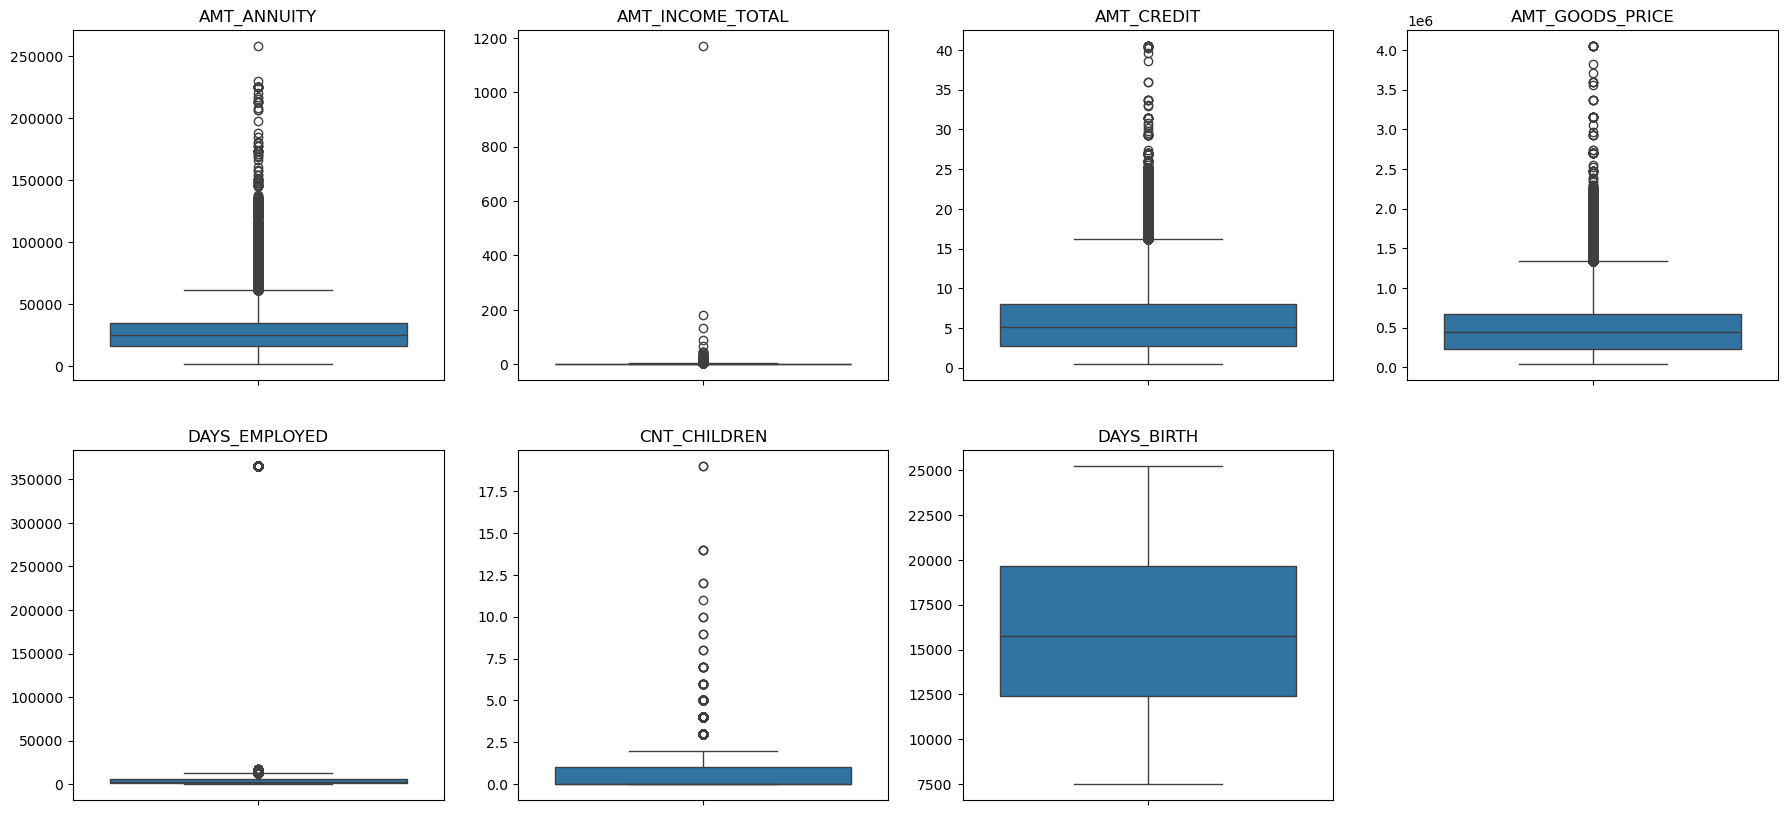

In [107]:
plt.figure(figsize=(22,10))

app_outlier_col_1 = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED']
app_outlier_col_2 = ['CNT_CHILDREN','DAYS_BIRTH']
for i in enumerate(app_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=app_data_new[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(app_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=app_data_new[i[1]])
    plt.title(i[1])
    plt.ylabel("")

- AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE, CNT_CHILDREN have some number of outliers.
- AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when   compared to the others.
- DAYS_BIRTH has no outliers which means the data available is reliable.
- DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible and hence this   has to be incorrect entry.
- We can see the stats for these columns below as well.

In [109]:
app_data_new[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].describe()

,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,CNT_CHILDREN,DAYS_EMPLOYED
count,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000
mean,27108.48784,1.68798,5.99026,538316.29437,16036.99507,0.41705,67724.74215
std,14493.46107,2.37123,4.02491,369288.98225,4363.98863,0.72212,139443.75181
min,1615.50000,0.25650,0.45000,40500.00000,7489.00000,0.00000,0.00000
25%,16524.00000,1.12500,2.70000,238500.00000,12413.00000,0.00000,933.00000
50%,24903.00000,1.47150,5.13531,450000.00000,15750.00000,0.00000,2219.00000
75%,34596.00000,2.02500,8.08650,679500.00000,19682.00000,1.00000,5707.00000
max,258025.50000,1170.00000,40.50000,4050000.00000,25229.00000,19.00000,365243.00000


### OUTLIERS In Previous_application

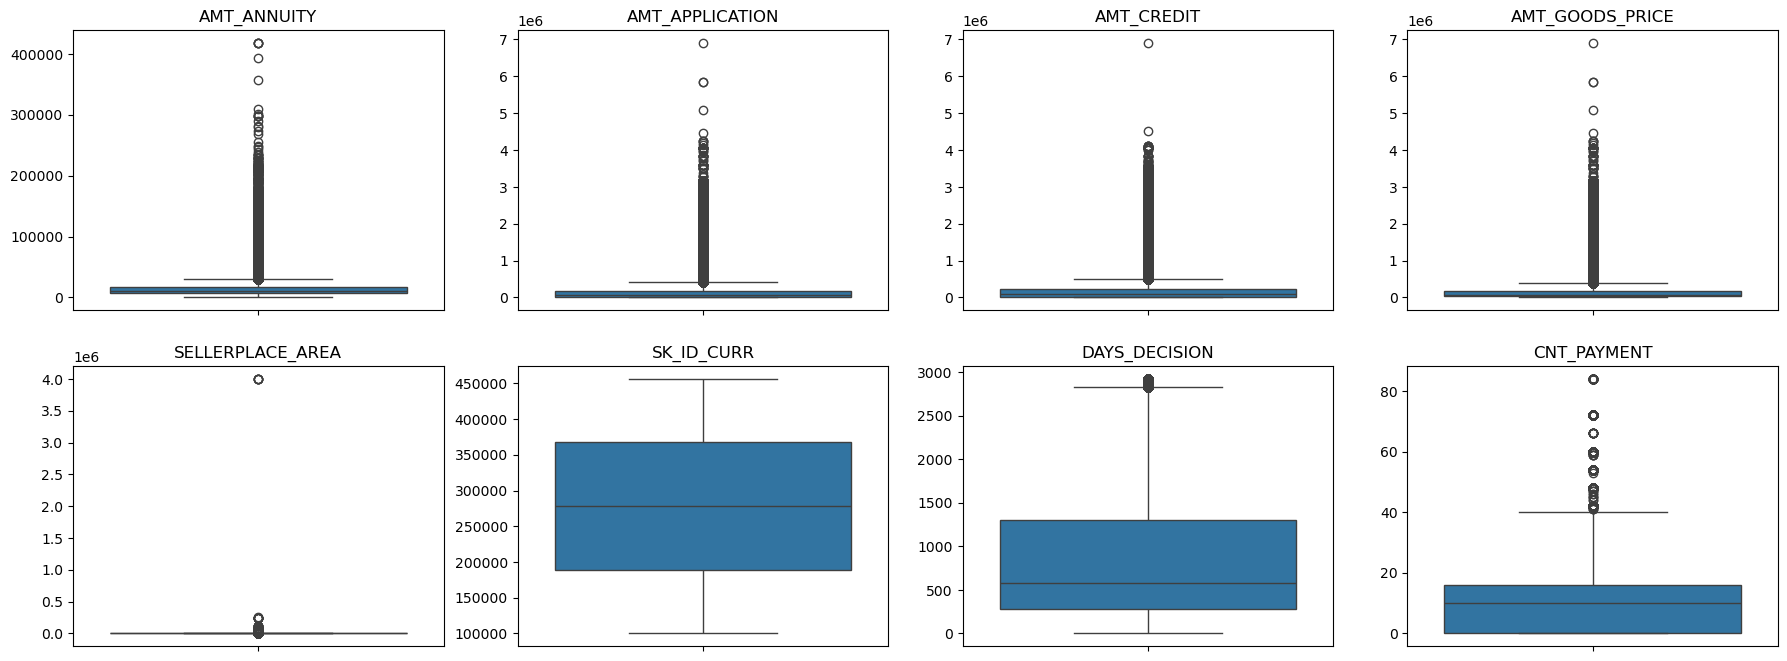

In [111]:
plt.figure(figsize=(22,8))

prev_outlier_col_1 = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA']
prev_outlier_col_2 = ['SK_ID_CURR','DAYS_DECISION','CNT_PAYMENT']
for i in enumerate(prev_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=prev_app_new[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(prev_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=prev_app_new[i[1]])
    plt.title(i[1])
    plt.ylabel("") 

## In previous application data
        
- AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers.
- CNT_PAYMENT has few outlier values
- SK_ID_CURR is an ID column and hence no outliers.
- DAYS_DECISION has little number of outliers indicating that these previous applications decisions were taken long   back.
- We can see the stats for these columns below as well.
  

In [113]:
# To suppress scientific notation in Pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x) 

In [114]:
prev_app_new[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA',
                      'CNT_PAYMENT','DAYS_DECISION']].describe()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_DECISION
count,1670214.00000,1670214.00000,1670213.00000,1670214.00000,1670214.00000,1670214.00000,1670214.00000
mean,14906.50618,175233.86036,196114.02122,185642.88579,313.95112,12.47621,880.67967
std,13177.51410,292779.76239,318574.61655,287141.31609,7127.44346,14.47588,779.09967
min,0.00000,0.00000,0.00000,0.00000,-1.00000,0.00000,1.00000
25%,7547.09625,18720.00000,24160.50000,45000.00000,-1.00000,0.00000,280.00000
50%,11250.00000,71046.00000,80541.00000,71050.50000,3.00000,10.00000,581.00000
75%,16824.02625,180360.00000,216418.50000,180405.00000,82.00000,16.00000,1300.00000
max,418058.14500,6905160.00000,6905160.00000,6905160.00000,4000000.00000,84.00000,2922.00000


#

# DATA ANALYSIS 

### IMBALANCE ANALYSIS
- #### Showing imbalance in a Pie Chart

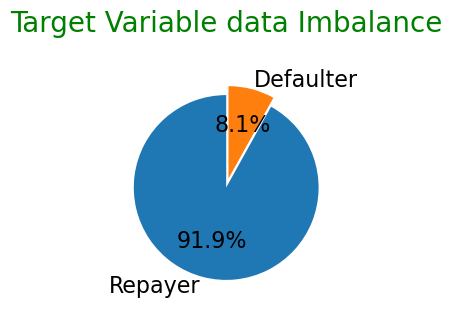

In [118]:
lables = 'Repayer','Defaulter'
explode = (0, 0.1)  
plt.figure(figsize = [5,3])

plt.pie(app_data_new["TARGET"].value_counts(), explode=explode, labels=lables, autopct='%1.1f%%', 
        textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'}, startangle=90)

# Adding and formatting title
plt.title("Target Variable data Imbalance\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

plt.show()

### Dividing the original dataset into two different datasets depending upon the target value

In [120]:
target0 = app_data_new.loc[app_data_new.TARGET == 0]
target1 = app_data_new.loc[app_data_new.TARGET == 1]
print("Dataframe for Records with Target Variable as 0: ",target0.shape)
print("Dataframe for Records with Target Variable as 1: ",target1.shape)

Dataframe for Records with Target Variable as 0:  (282686, 79)
Dataframe for Records with Target Variable as 1:  (24825, 79)


In [121]:
target0_perc = round(target0.shape[0]/(target0.shape[0]+target1.shape[0])*100,2)
target1_perc = round(target1.shape[0]/(target0.shape[0]+target1.shape[0])*100,2)

In [122]:
print('Ratios of imbalance for Repayer and Defaulter in Percentage is:',target0_perc,'and' ,target1_perc)
print('Ratios of imbalance for Repayer Vs Defaulter is:',round((target0_perc/target1_perc),2),":1 approx")

Ratios of imbalance for Repayer and Defaulter in Percentage is: 91.93 and 8.07
Ratios of imbalance for Repayer Vs Defaulter is: 11.39 :1 approx


## Categorical Variable Analysis
### Segmented Univariate Analysis
### NAME_CONTRACT_TYPE

-  Distribution based on Contract Type of Loan - Revolving or Cash Loans

In [125]:
def create_pie_plot(column, df):
    df[column].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6),startangle=90,legend=True)
    plt.title(f"Distribution of {column.title()} Variable", fontsize=16, color='Black')
    plt.legend(bbox_to_anchor=(1, 0, 0.5, 1),loc="center right", fontsize=12, bbox_transform=plt.gcf().transFigure)
    plt.ylabel("") 
    plt.show()

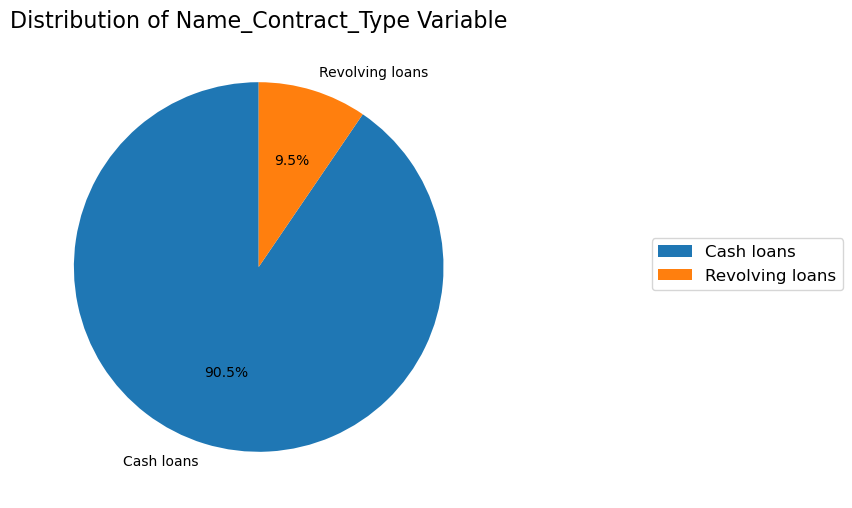

In [126]:
create_pie_plot('NAME_CONTRACT_TYPE',app_data_new)

In [127]:
def univariate_categorical(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = app_data_new[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = app_data_new[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc["TARGET"] = cat_perc["TARGET"]*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
        
    # 1. Subplot 1: Count plot of categorical column
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=app_data_new,
                    hue ="TARGET",
                    order=cat_perc[feature],
                    palette=['g','r'])
    
    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 10, 'fontweight' : 10, 'color' : 'Blue'}) 
    ax1.legend(['Repayer','Defaulter'])
    s.set_xlabel("")
   
    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 8, 'fontweight' : 3, 'color' : 'Blue'})   
        ax1.set_xlabel("")
        ax1.tick_params(axis='both', which='major', labelsize=10)
    else:        
        ax1.set_ylabel("Count",fontdict={'fontsize' : 15, 'fontweight' : 3, 'color' : 'Blue'})   
        ax1.set_xlabel("")
        ax1.tick_params(axis='both', which='major', labelsize=15)        
        
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
        s.set_xlabel("")
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='TARGET', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
        s.set_xlabel("")
    plt.ylabel('Percent of Defaulters [%]', fontsize=10,fontweight=3, color='Blue')
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 10, 'fontweight' : 10, 'color' : 'Blue'}) 
    ax2.set_xlabel("")
    plt.show();

- ### Checking the contract type based on loan repayment status
- ### Inferences: Contract type: Revolving loans are just a small fraction (10%) from the total number of loans; Also majority of the Revolving loans have been defaulted.

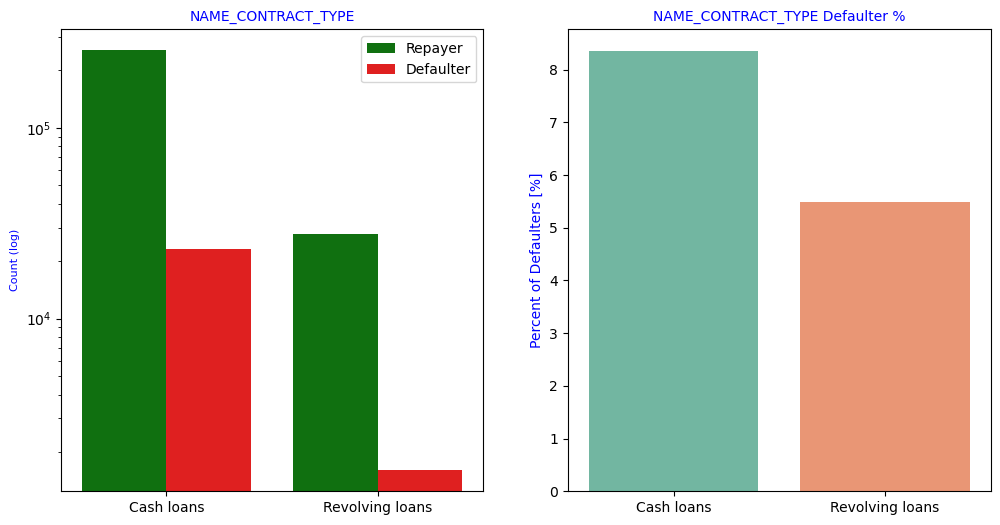

In [129]:
univariate_categorical('NAME_CONTRACT_TYPE',True)

#

### NAME_HOUSING_TYPE
- ### Distribution of Various housing Type for the provided set of records

In [132]:
def create_bar_plot(Column,dataframe):
    dataframe[Column].value_counts().plot.bar()
    title = "Distribution of "+ Column.title() + " Variable"
    plt.title(title,color="blue", fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'blue'})
    plt.xticks(size=10,color='Black')
    plt.show()

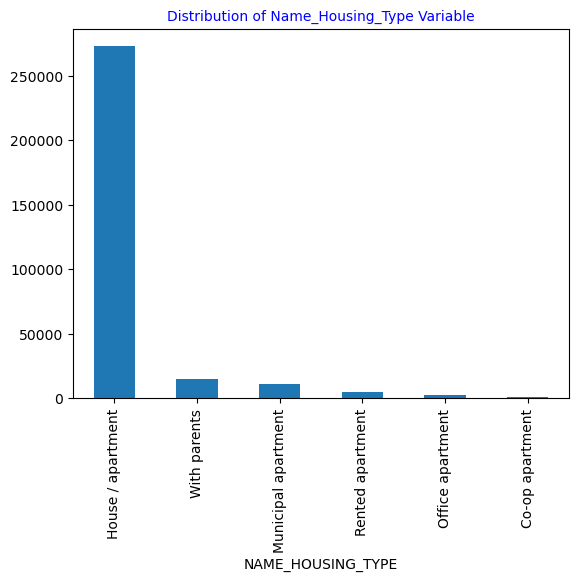

In [133]:
create_bar_plot('NAME_HOUSING_TYPE',app_data_new)

- ### Analyzing Housing Type based on loan repayment status
- # Inferences:
- Majority of people live in House/apartment
- People living in office apartments have lowest default rate
- People living with parents and living in rented apartments have higher probability of defaulting 

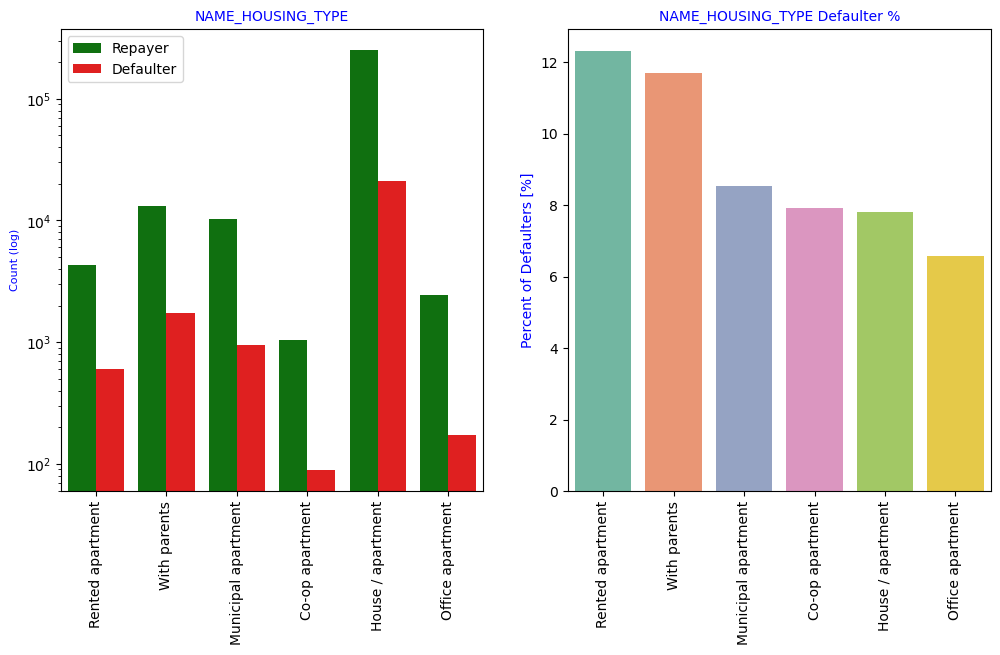

In [135]:
univariate_categorical("NAME_HOUSING_TYPE",True,True,True)

### NAME_FAMILY_STATUS

In [137]:
def create_pie_plot2(Column,dataframe):
    plt.figure(figsize=[10,5])
    dataframe[Column].value_counts(normalize=True).plot.pie(autopct='%1.1f%%',textprops={'fontsize': 8, 'fontweight' : 8, 'color' : 'Black'},labeldistance=1.05)
    title = "Distribution of "+ Column.title() + " Variable"
    plt.title(title, fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Green'})
    plt.ylabel("")
    plt.show()

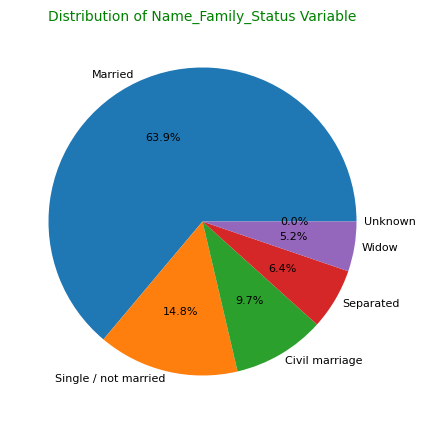

In [138]:
create_pie_plot2("NAME_FAMILY_STATUS",app_data_new)

- ## Analyzing Family status based on loan repayment status
- ## Inferences:
- Most of the people who have taken loan are married, followed by Single/not married and civil marriage
- In terms of percentage of not repayment of loan, Civil marriage has the highest percent of not repayment, with Widow the lowest. 

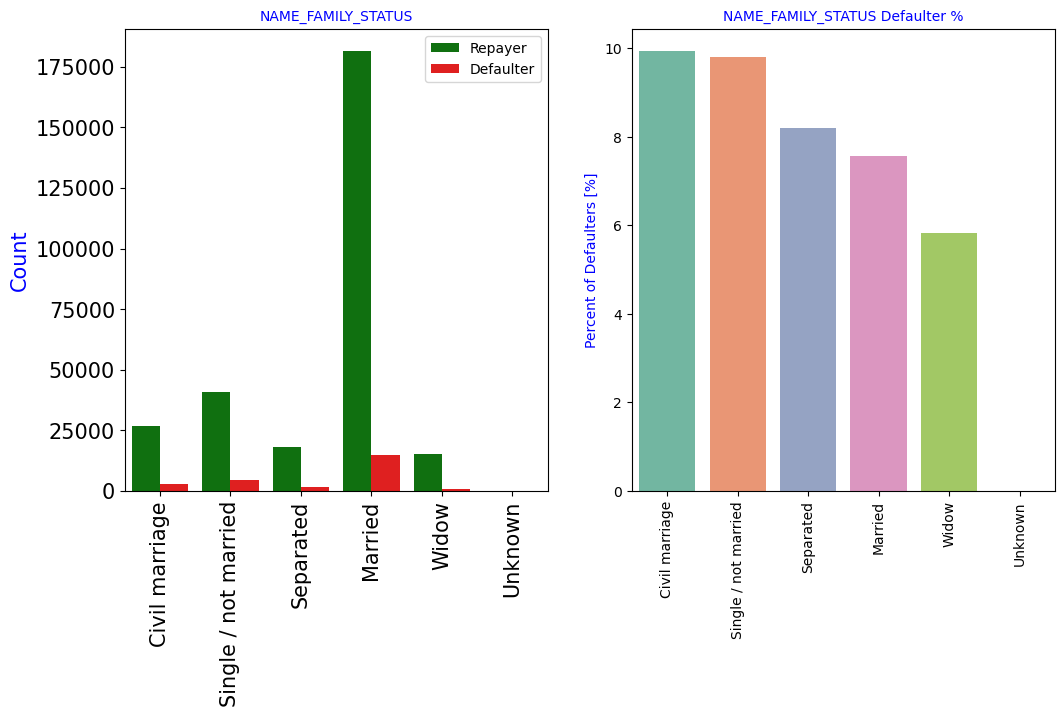

In [140]:
univariate_categorical("NAME_FAMILY_STATUS",False,True,True)

## NAME_EDUCATION_TYPE

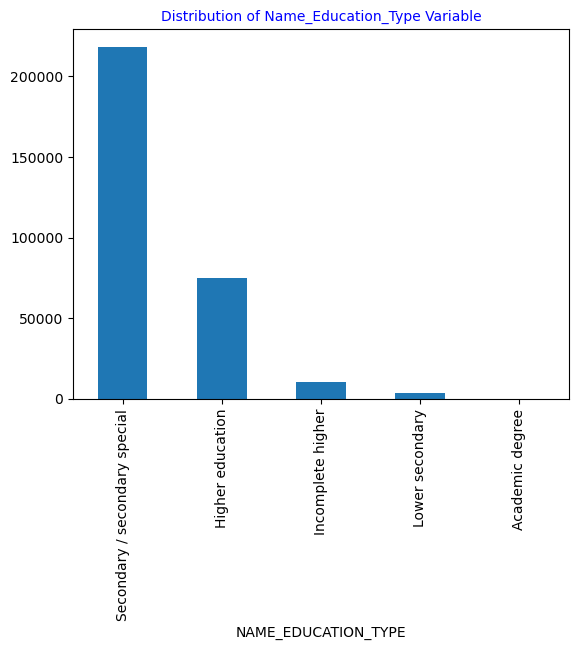

In [142]:
create_bar_plot("NAME_EDUCATION_TYPE",app_data_new)

## Analyzing Education Type based on loan repayment status
### Inferences:
       
- Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree
- The Lower secondary category, although rare, have the largest rate of defaulters. The people with Academic degree have the lowest defaulting rate.

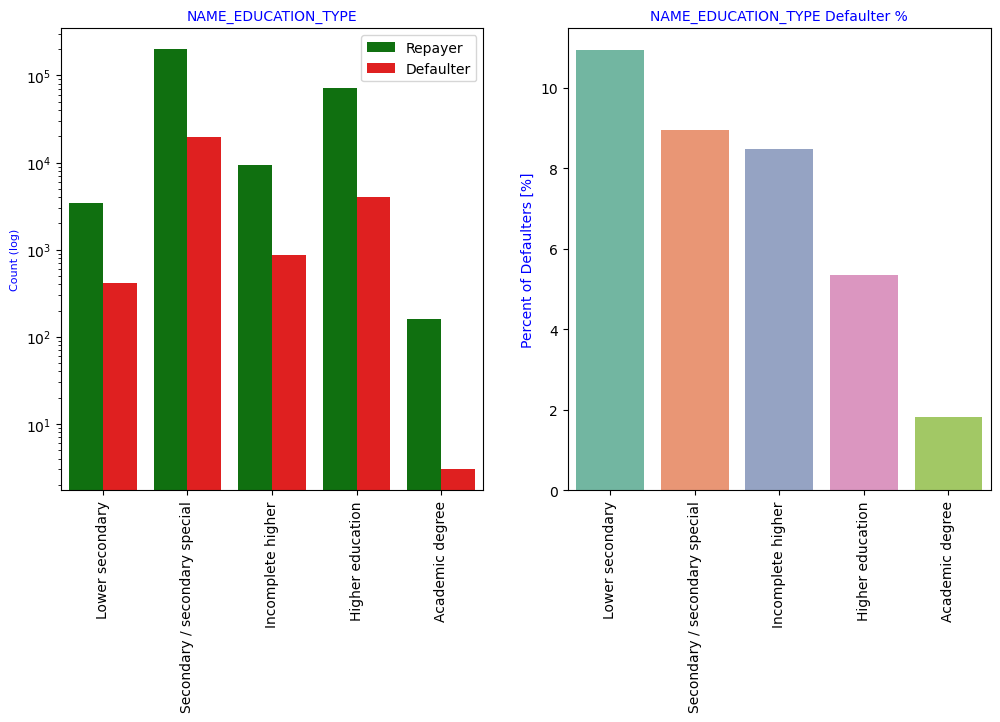

In [144]:
univariate_categorical("NAME_EDUCATION_TYPE",True,True,True)

## NAME_INCOME_TYPE

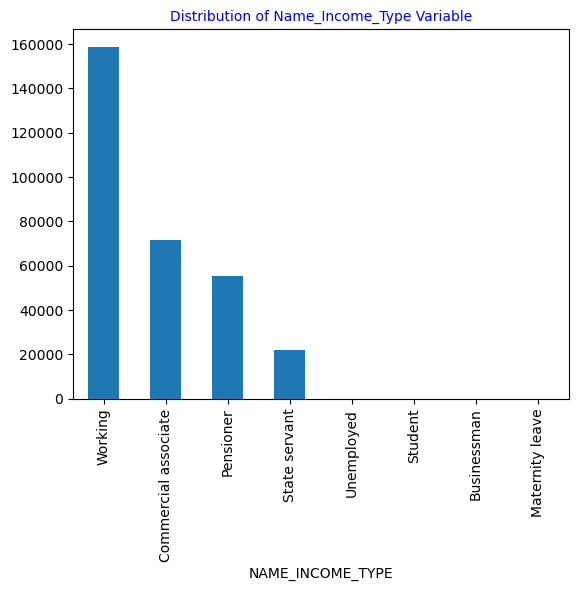

In [146]:
create_bar_plot("NAME_INCOME_TYPE",app_data_new)

## Analyzing Income Type based on loan repayment status

In [148]:
def univariate_categorical2(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = app_data_new[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = app_data_new[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc["TARGET"] = cat_perc["TARGET"]*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
        
    # 1. Subplot 1: Count plot of categorical column
   
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=app_data_new,
                    hue ="TARGET",
                    order=cat_perc[feature],
                    palette=['g','r'])
    
  
    ax1.set_title(feature, fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'}) 
    ax1.legend(['Repayer','Defaulter'])
    
    
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})   
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
   
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='TARGET', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show();

#

### INFERENCES
- Most of applicants for loans have income type as Working, followed by Commercial associate, Pensioner and State servant.
- The applicants with the type of income Maternity leave have almost make 40% ratio of the defaulters, followed by Unemployed (37%). The rest of types of incomes are under the average of 10% for not returning loans.
- Student and Businessmen, though less in numbers do not have any default record. Thus these two category are safest for providing loan.  

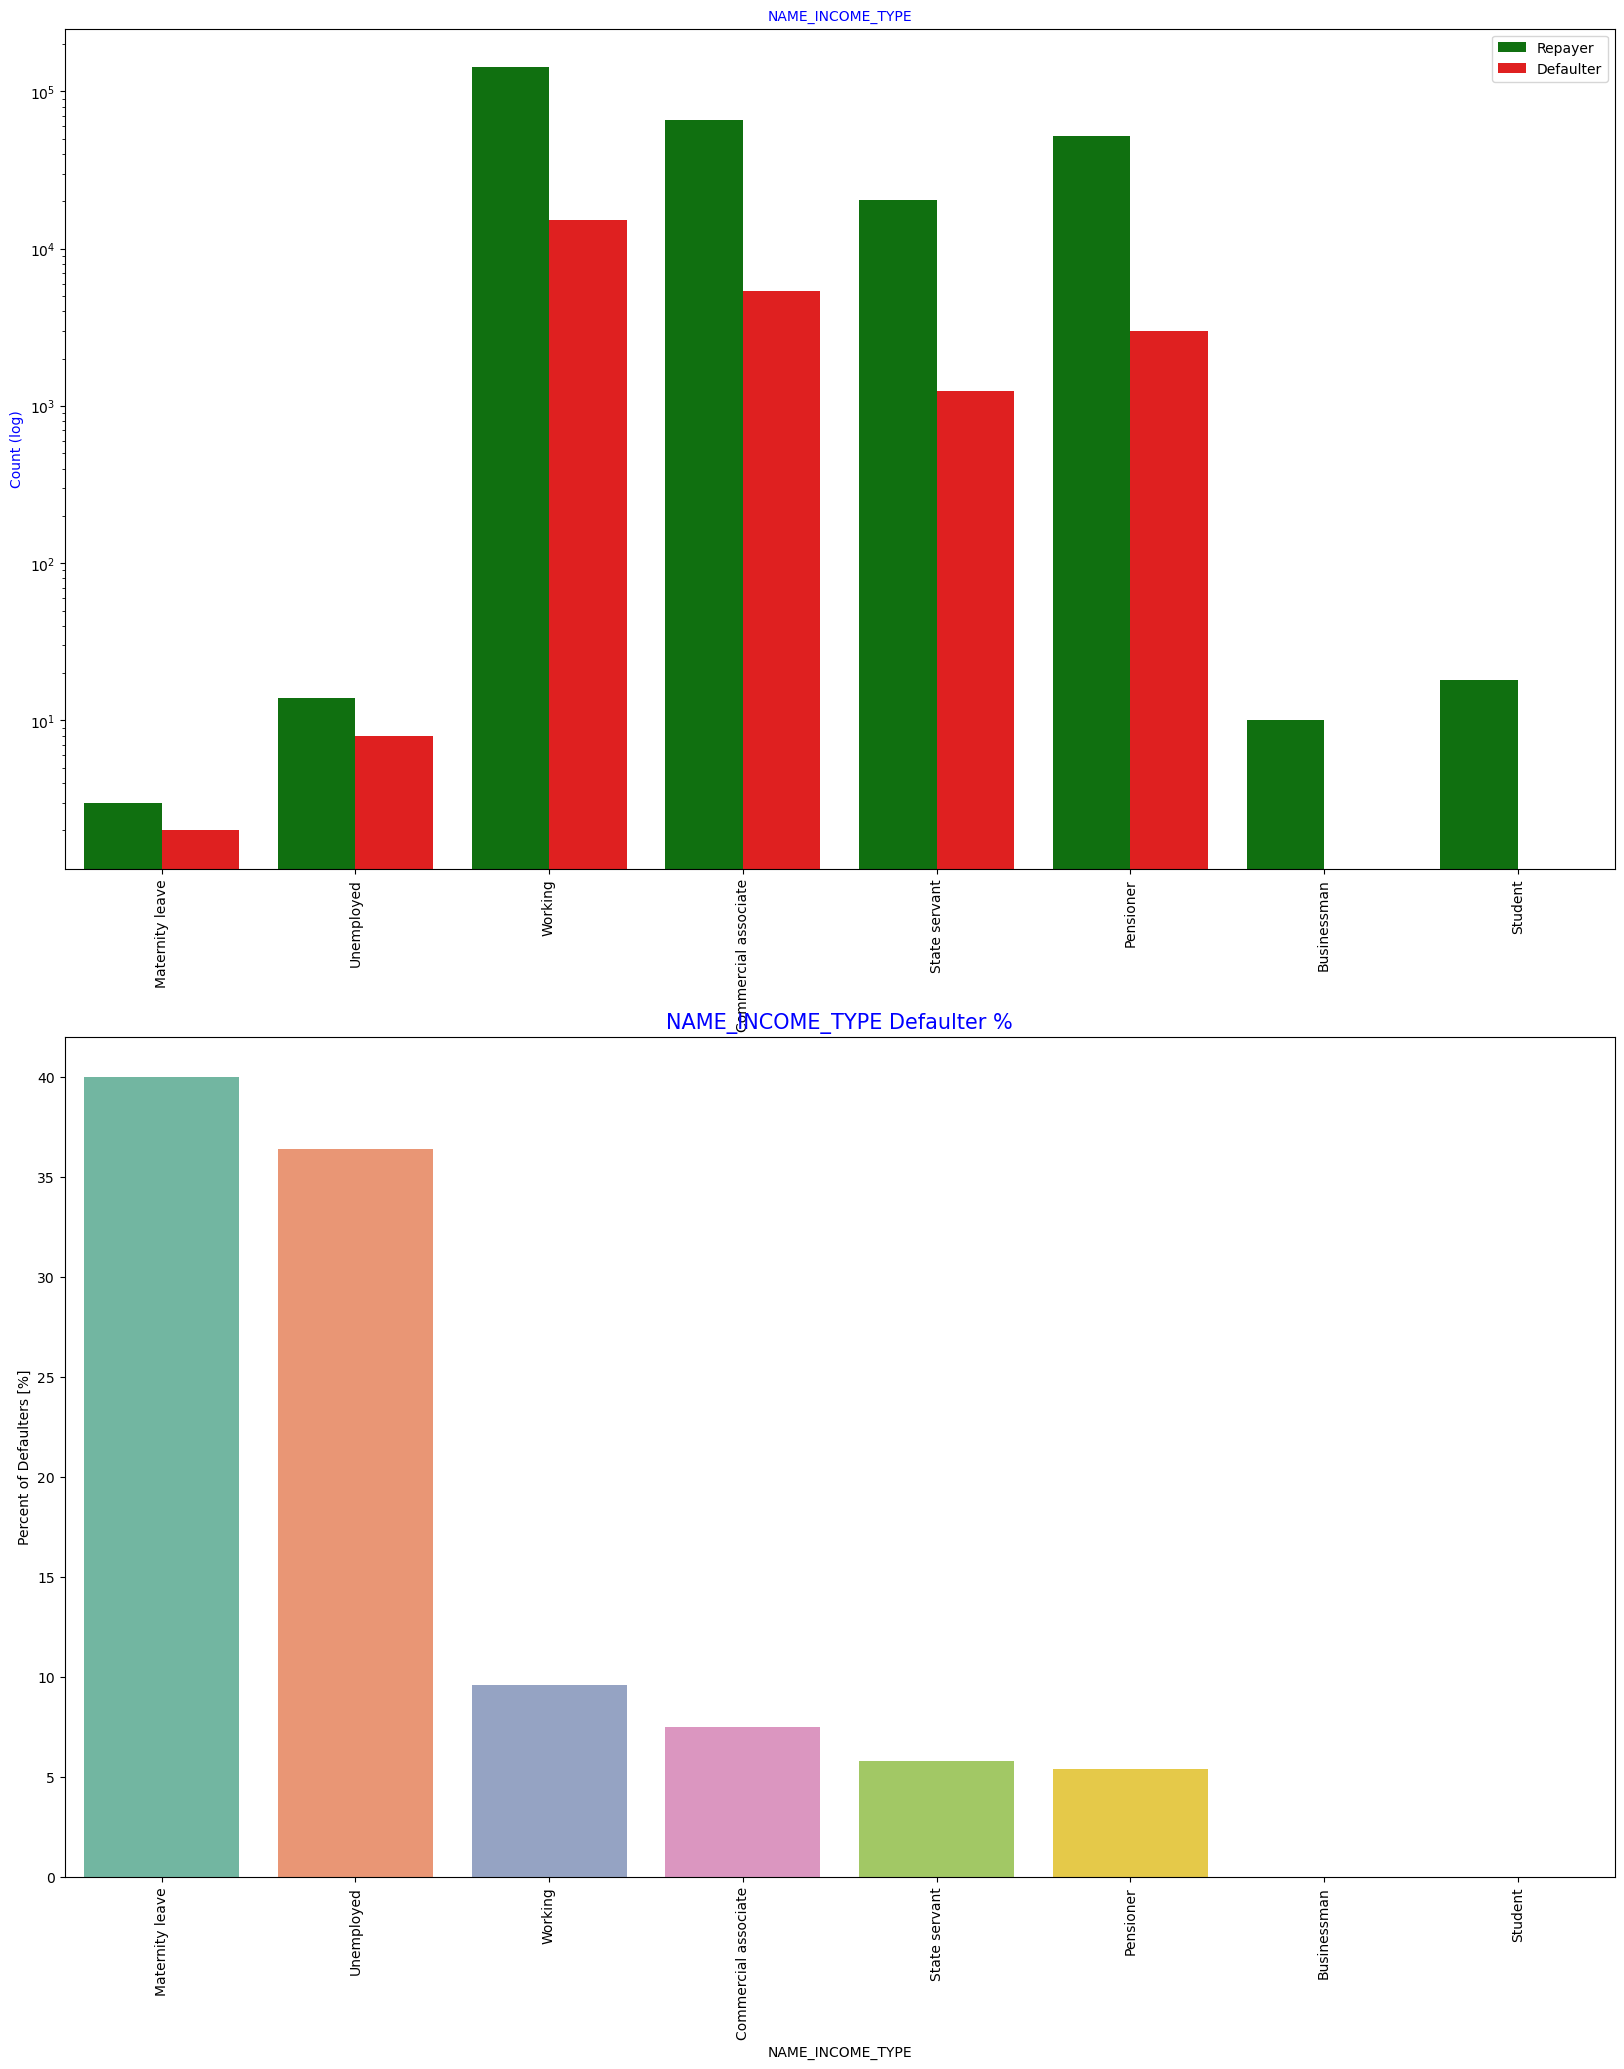

In [151]:
univariate_categorical2("NAME_INCOME_TYPE",True,True,False)

## REGION_RATING_CLIENT
- #### Distribution of REGION RATINGs of Clients living location

In [153]:
def create_pie_plot(column, df):
    df[column].value_counts().plot.pie(autopct='%1.1f%%', figsize=(5,5),startangle=90,legend=True)
    plt.title(f"Distribution of {column.title()} Variable", fontsize=16, color='Black')
    plt.ylabel("") 
    plt.show()

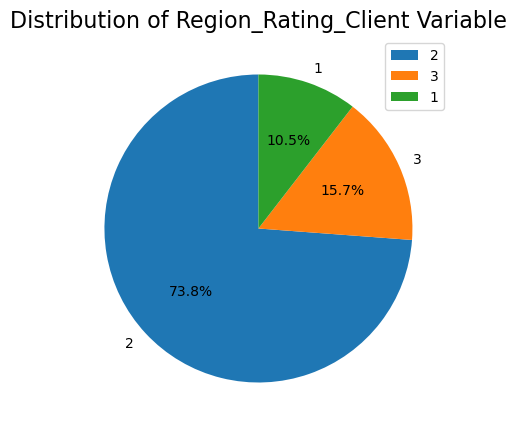

In [154]:
create_pie_plot("REGION_RATING_CLIENT",app_data_new)

- ##  Analyzing Region rating where applicant lives based on loan repayment status
- ## INFERENCES:
- Most of the applicants are living in Region_Rating 2 place.
- Region Rating 3 has the highest default rate (11%) , followed by 2( around 8%) and 1(around 5%)
- Applicant living in Region_Rating 1 has the lowest probability of defaulting, thus safer for approving loans

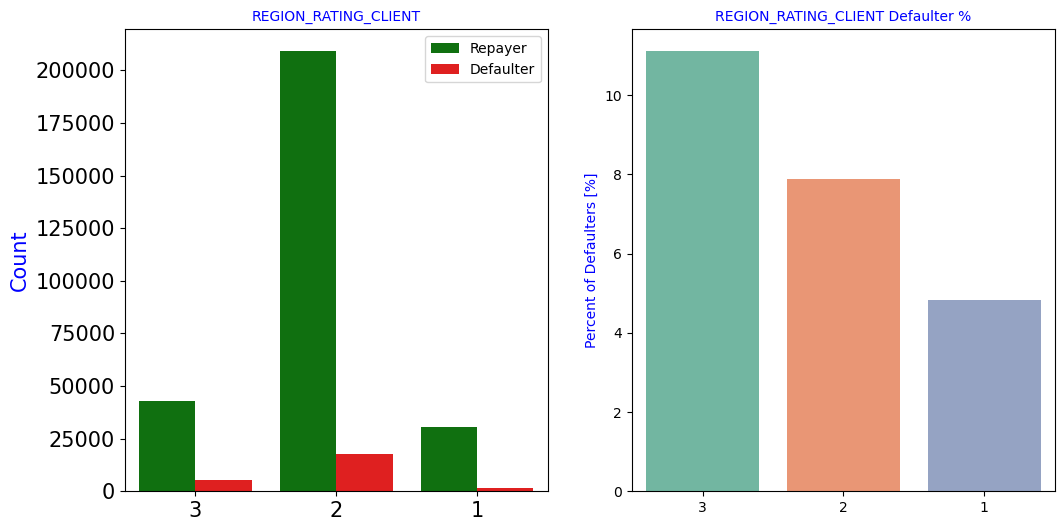

In [156]:
univariate_categorical("REGION_RATING_CLIENT",False,False,True)

## OCCUPATION_TYPE
- ### Distribution of OCCUPATION_TYPE of Clients

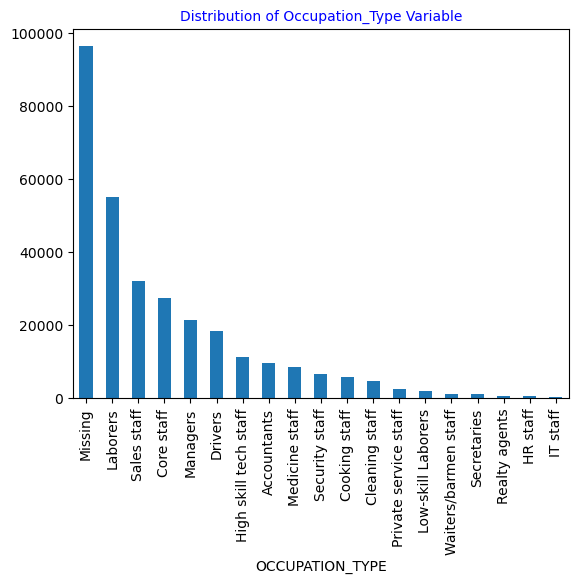

In [158]:
create_bar_plot("OCCUPATION_TYPE",app_data_new)

## Analyzing Occupation Type where applicant lives based on loan repayment status
### Inferences:
- Most of the loans are taken by people whose Occupation is "Missing" in the dataset followed by Laborers, Sales staff. IT staff take the lowest amount of loans.
- The category with highest percent of not repaid loans are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff.

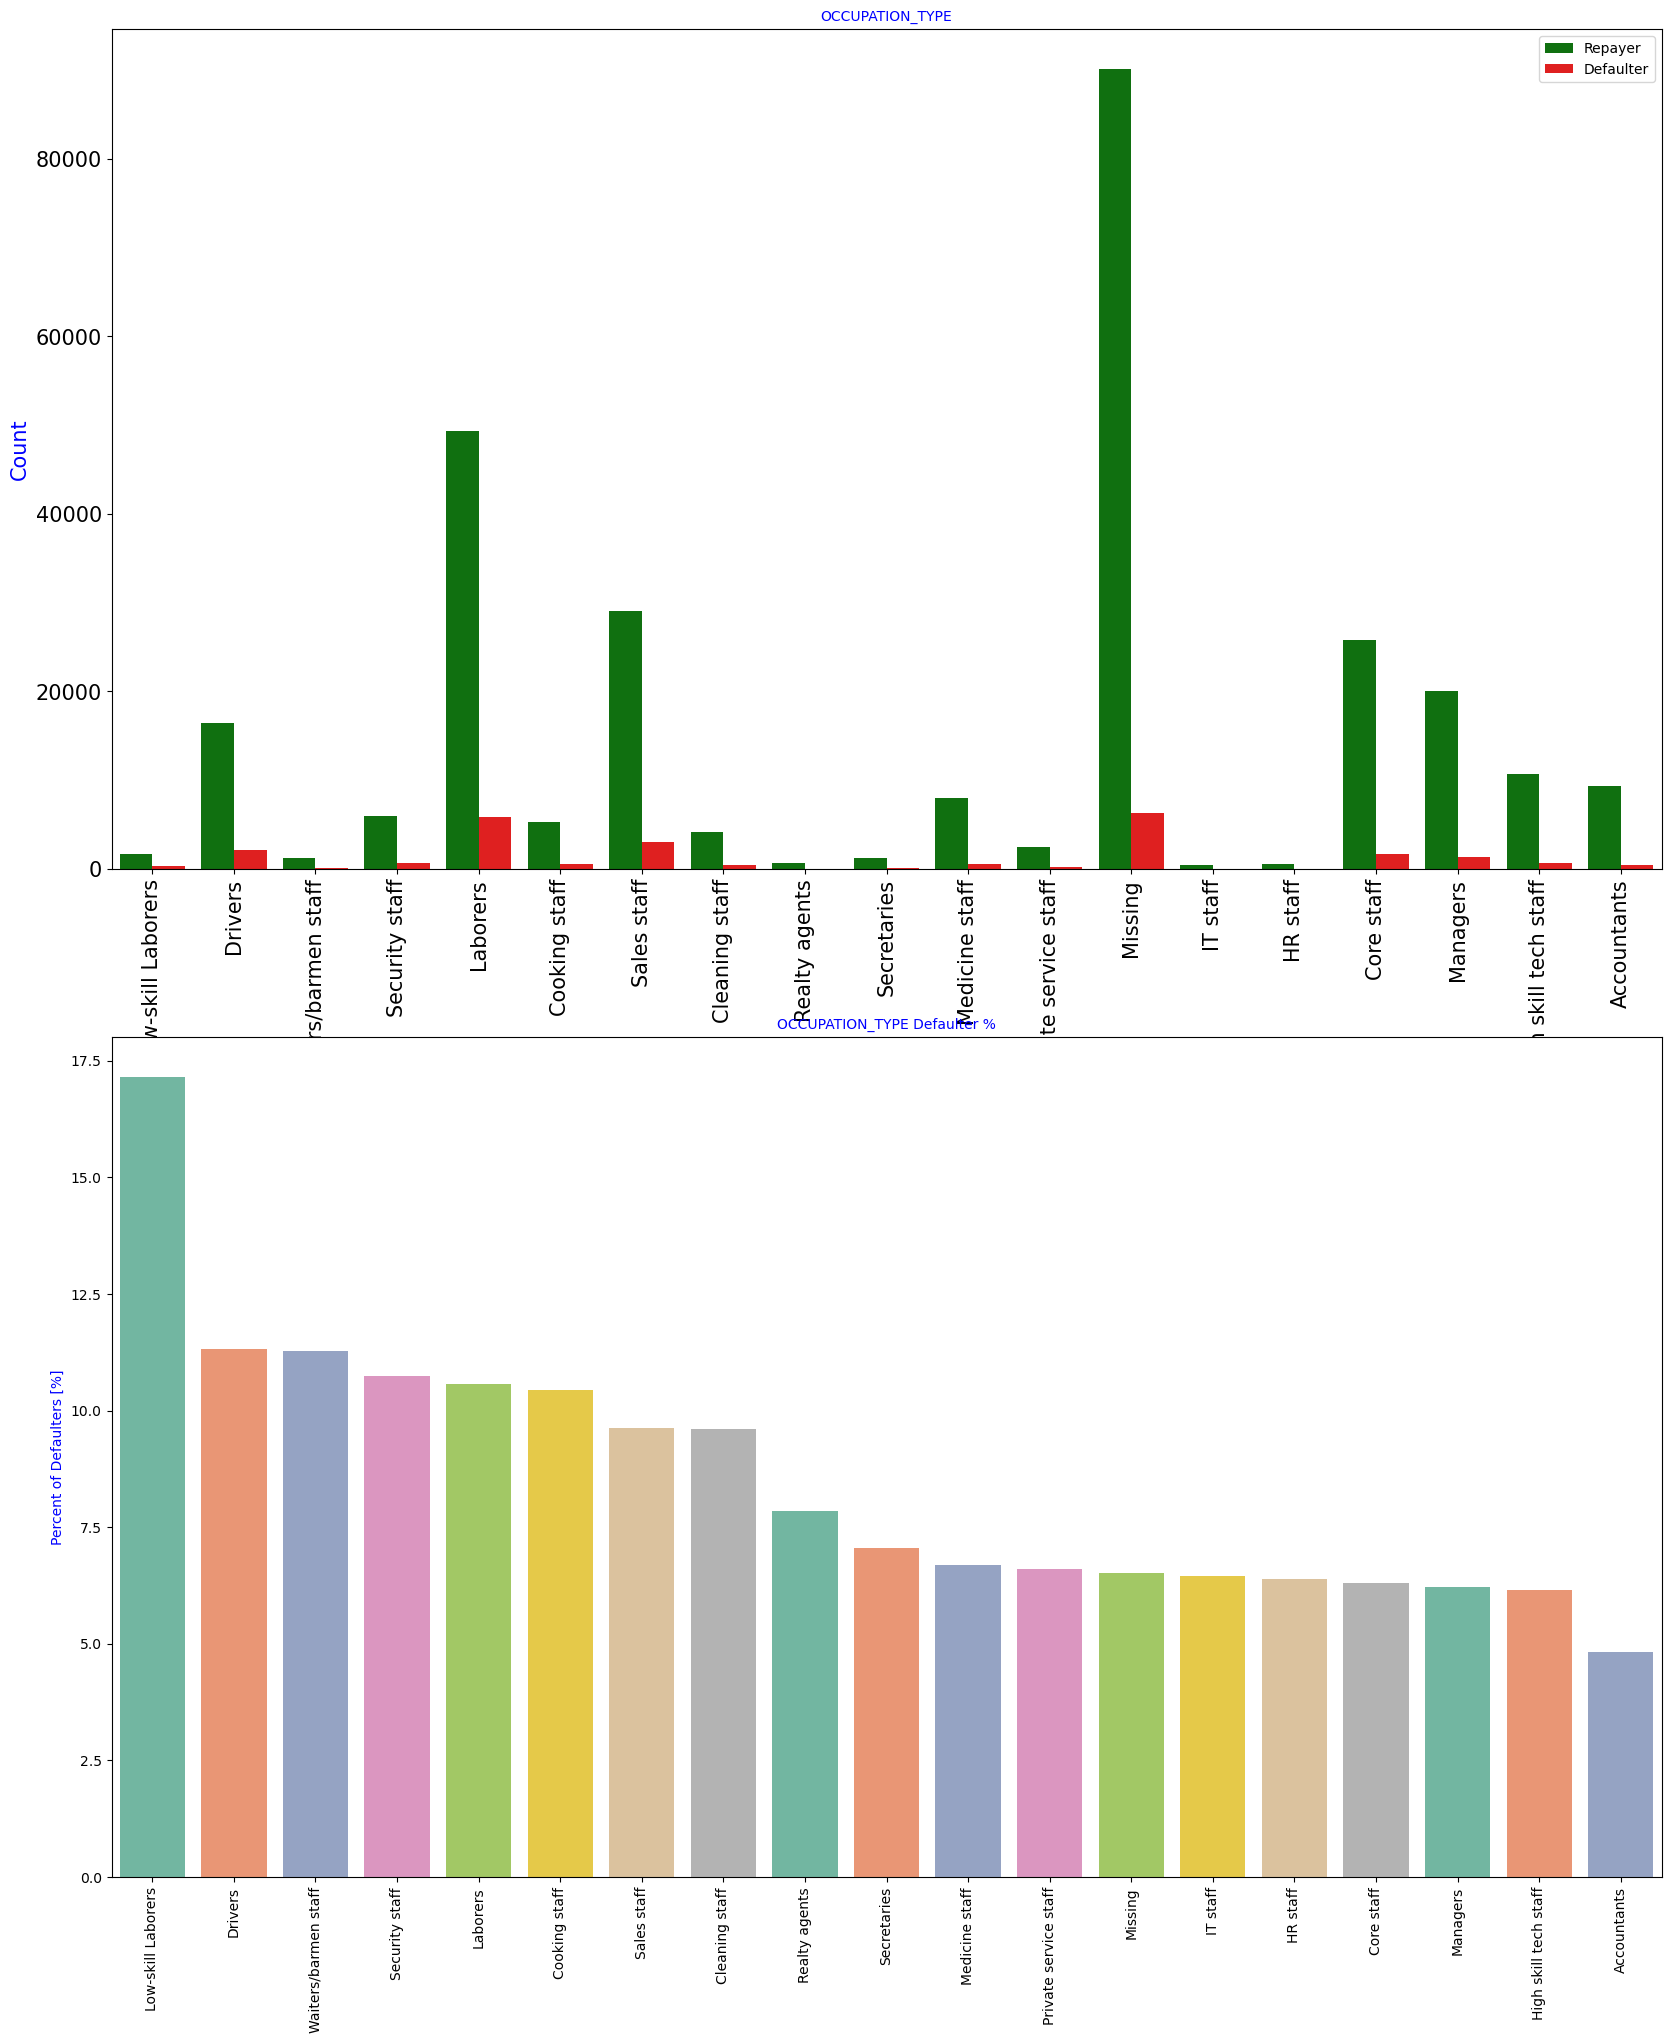

In [160]:
univariate_categorical("OCCUPATION_TYPE",False,True,False)

## ORGANIZATION_TYPE

#### Distribution of ORGANIZATION_TYPE of the Clients

In [163]:
def create_barh_plot(Column,dataframe):
    plt.figure(figsize = (15,20))
    dataframe[Column].value_counts().plot.barh()
    title = "Distribution of "+ Column.title() + " Variable"
    plt.title(title,color="blue", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Black'})
    plt.xticks(size=15,color='Black')
    plt.show()

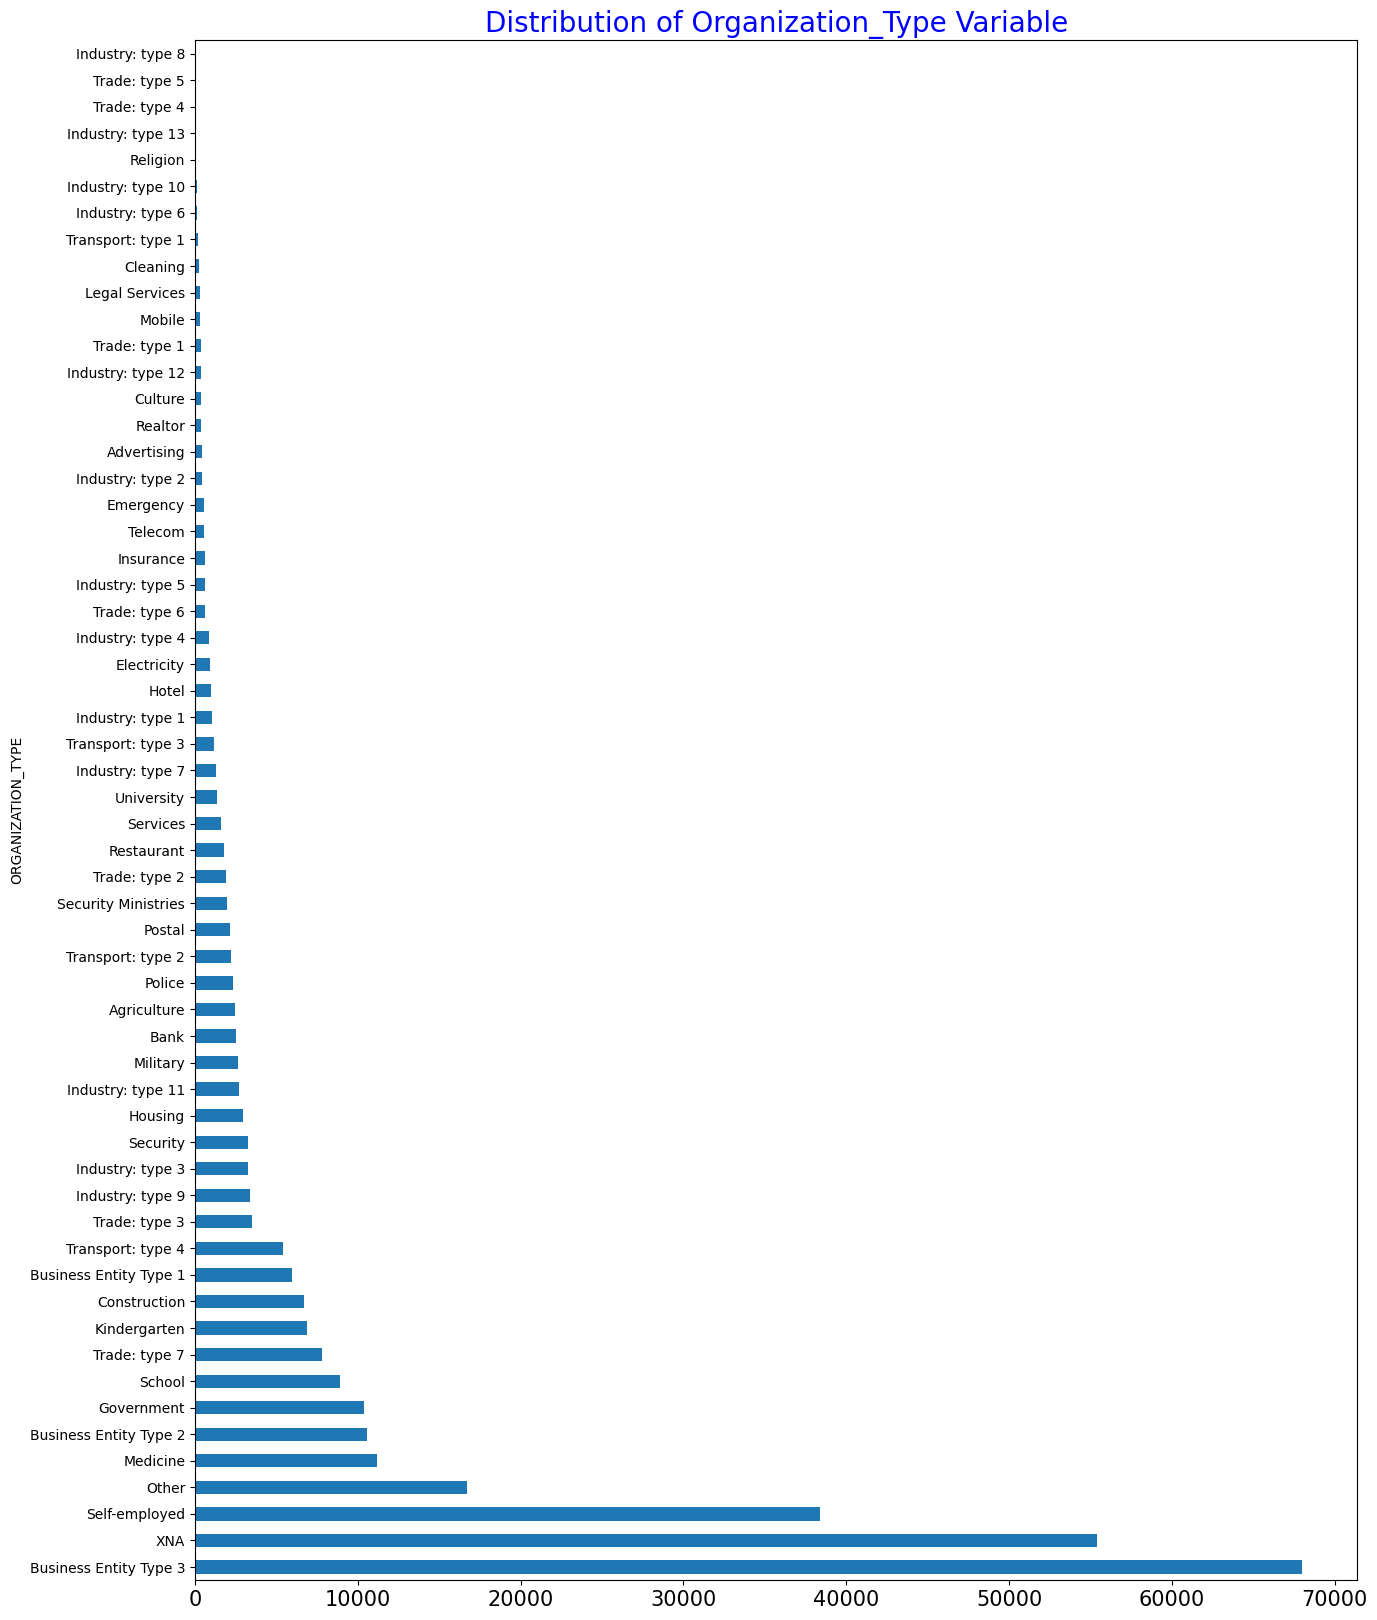

In [164]:
create_barh_plot("ORGANIZATION_TYPE",app_data_new)

#

### Checking Loan repayment status based on Organization type
### Inferences:
- Most of the applications for loan are from people working in Business Entity Type 3 organization
- Organizations with highest percent of loans not repaid are Transport: type 3 (around 16%), Industry: type 13 (13.5%), Industry: type 8 (around 12.5%) and Restaurant (less than 12%). 
- Self employed people have relative high defaulting rate (10%), and thus should be thoughly scrutized before being approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.
- For a very high number of applications, Organization type information is unavailable(XNA)
- It can be seen that following category of organization type has lesser defaulters thus safer for providing loans:
    - Trade Type 4
    - Industry type 12

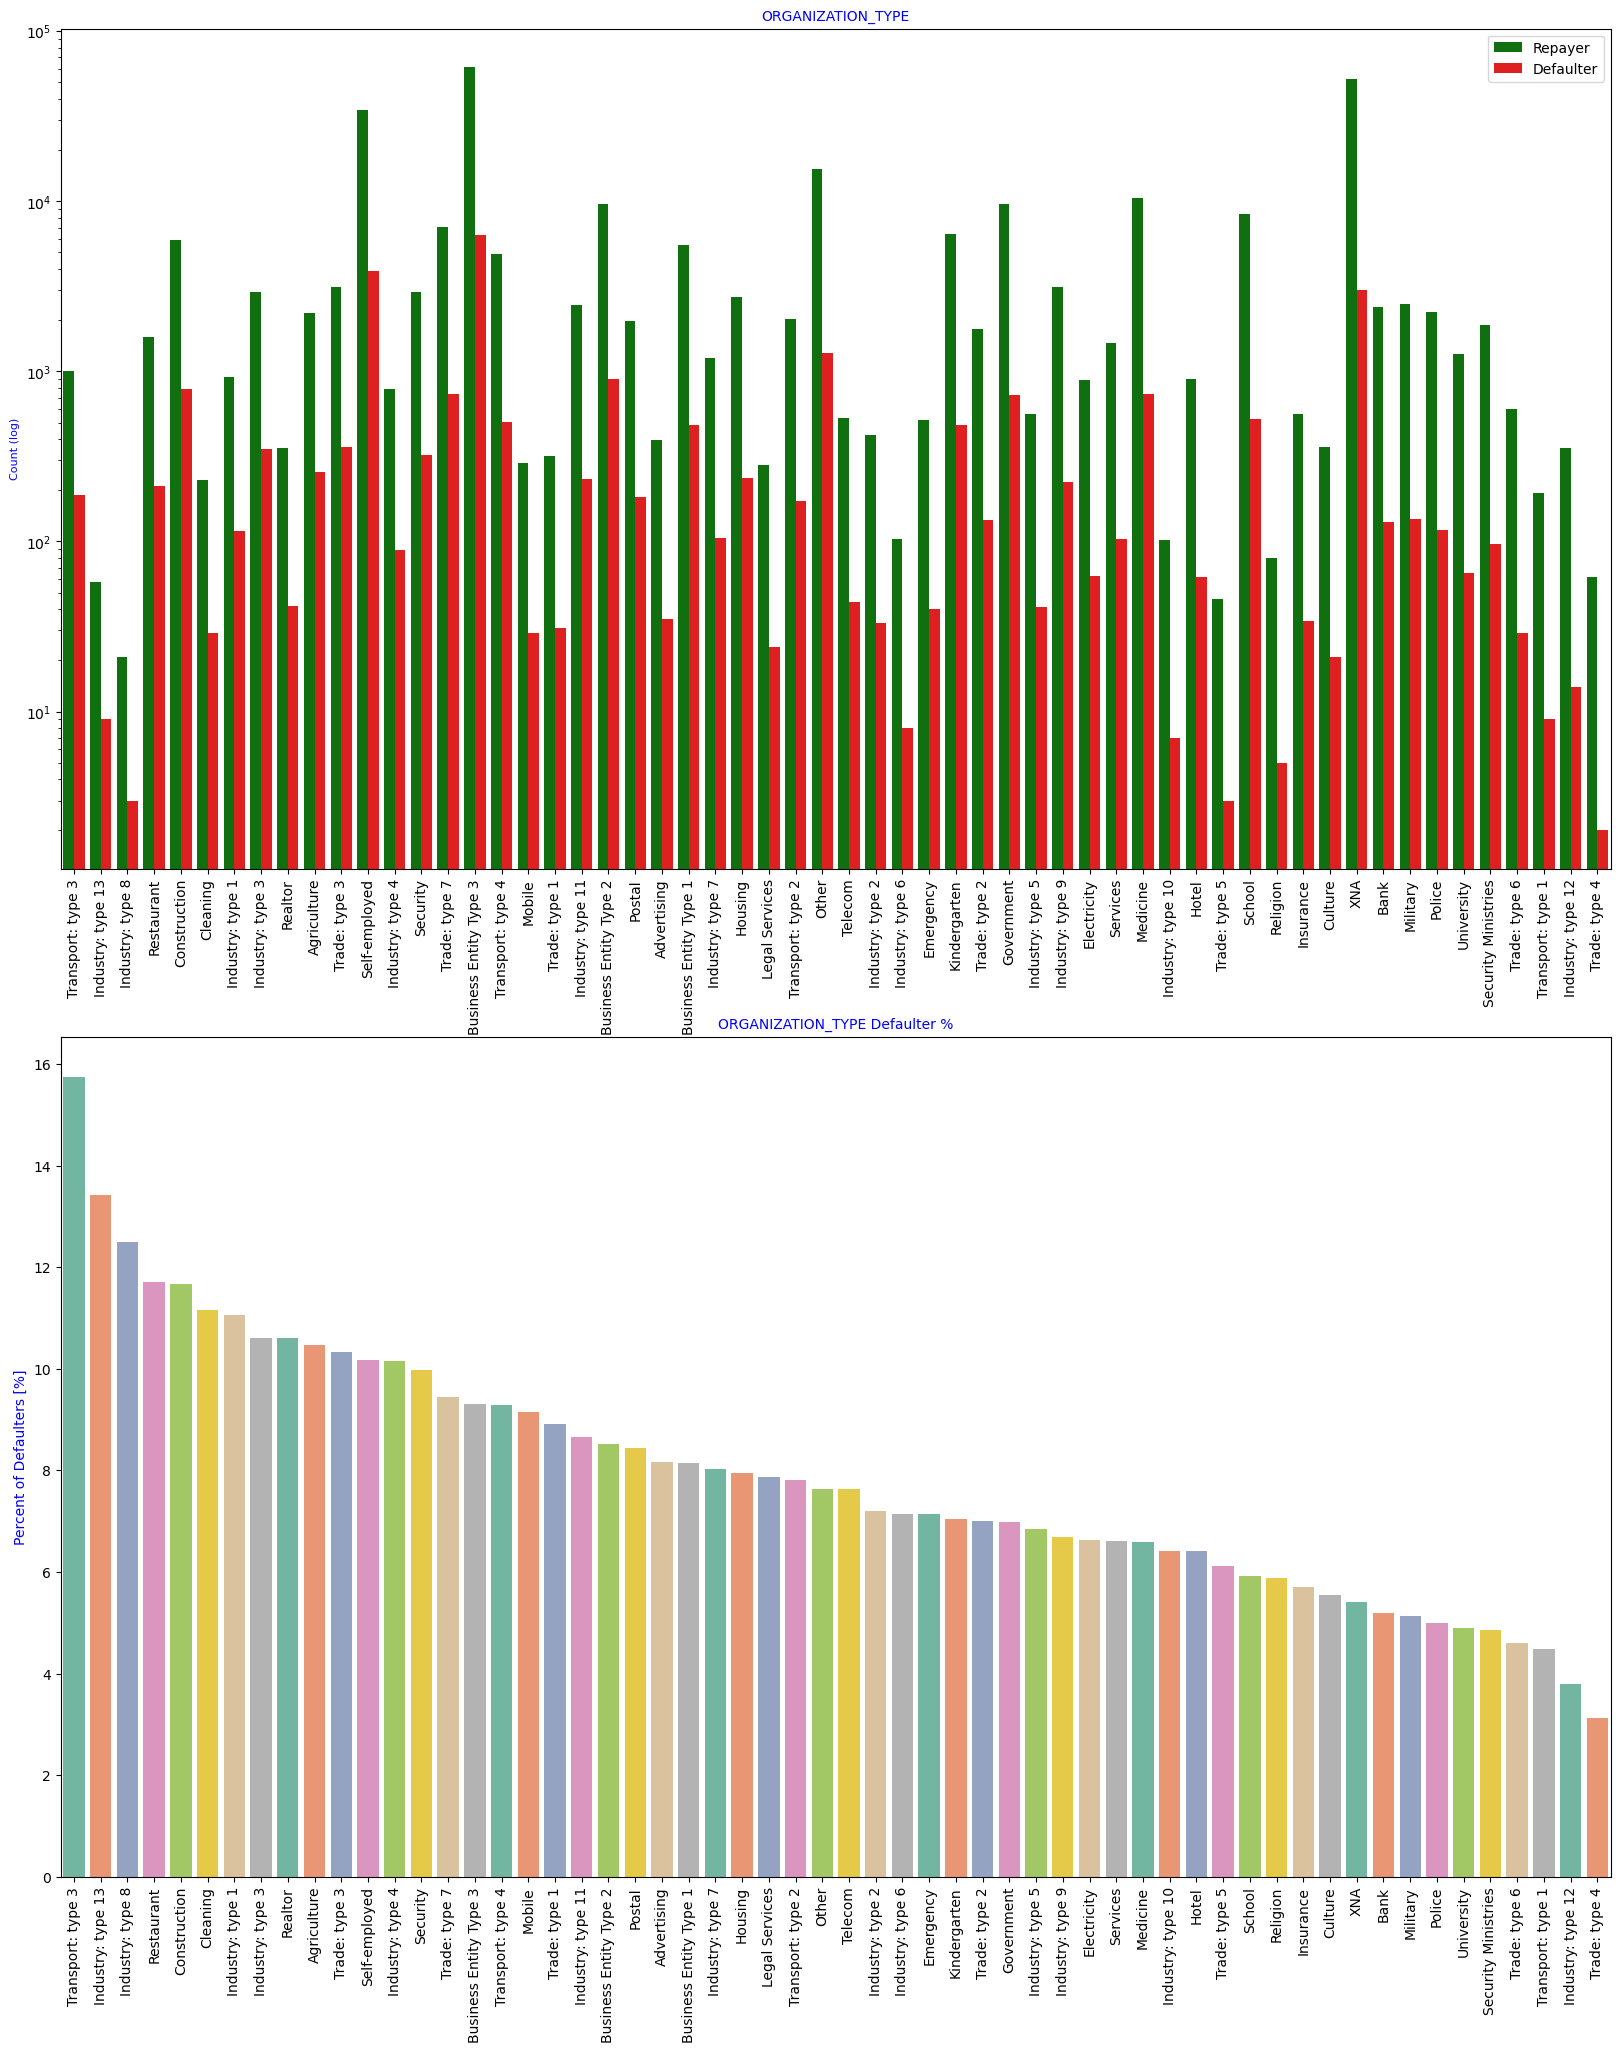

In [167]:
univariate_categorical("ORGANIZATION_TYPE",True,True,False)

## AGE_GROUP
###  Distribution of AGE_GROUP of the Clients from  the provided application dataset

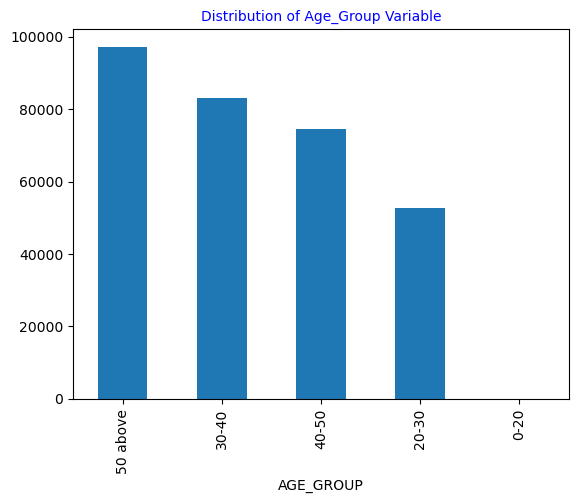

In [169]:
create_bar_plot("AGE_GROUP",app_data_new)

## Analyzing Age Group based on loan repayment status
## INFERENCES:
- People in the age group range 20-40 have higher probability of defaulting
- People above age of 50 have low probability of defaulting

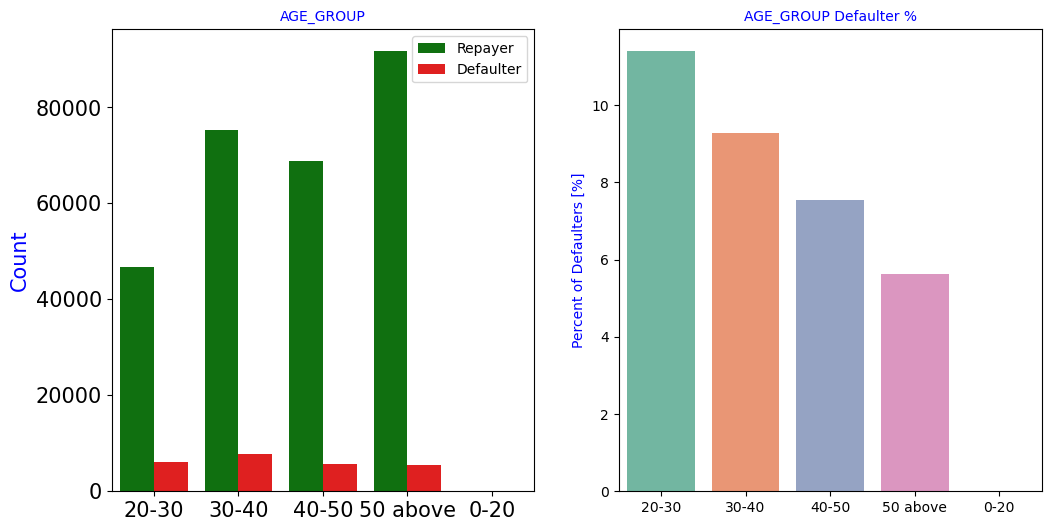

In [171]:
univariate_categorical("AGE_GROUP",False,False,True)

## YEARS_EMPLOYED_RANGE
-  Distribution of YEARS_EMPLOYED_RANGE of the Clients from  the provided application dataset

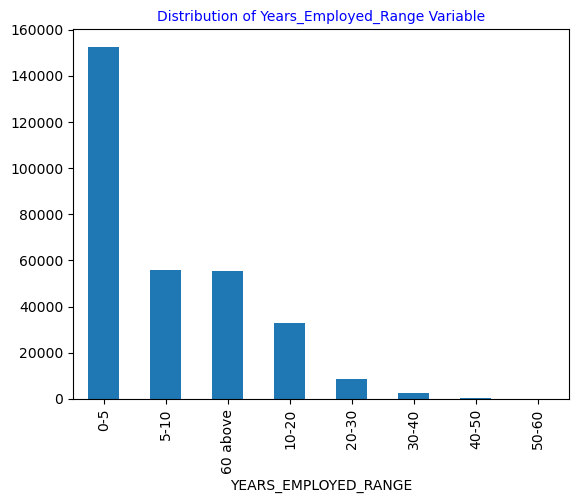

In [173]:
create_bar_plot("YEARS_EMPLOYED_RANGE",app_data_new)

### Analyzing YEARS_EMPLOYED_RANGE based on loan repayment status
### INFERENCES:
- Majority of the applicants have been employed in between 0-5 years. The defaulting rating of this group is also the highest which is More than 10%.
- With increase of employment year, defaulting rate is gradually decreasing with people having 40+ year experience having less than 1% default rate.

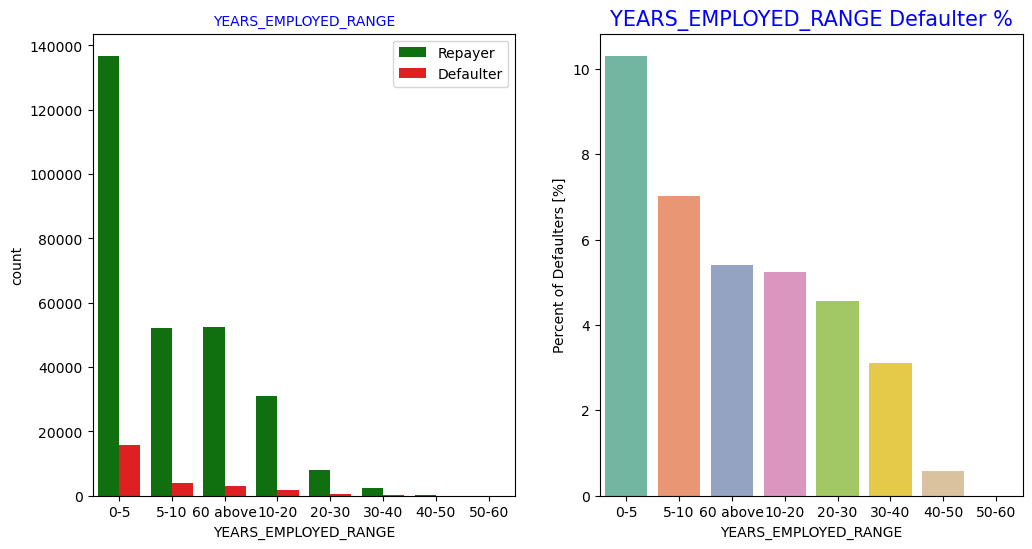

In [175]:
univariate_categorical2("YEARS_EMPLOYED_RANGE",False,False,True)

## AMT_CREDIT_RANGE
### Distribution of Loan Amount of the Clients from the provided application dataset

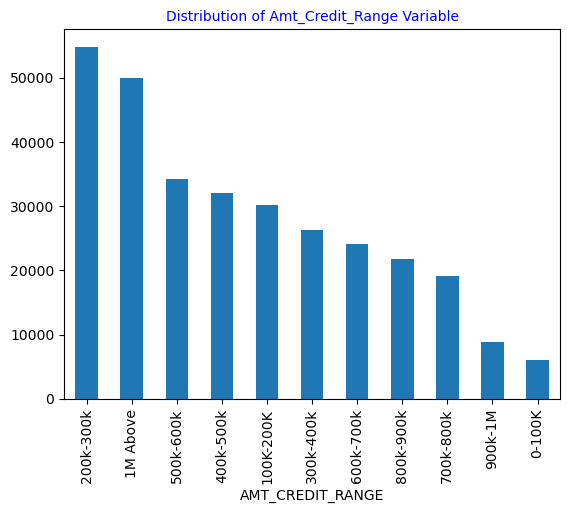

In [177]:
create_bar_plot("AMT_CREDIT_RANGE",app_data_new) 

## Analyzing Amount_Credit based on loan repayment status
## INFERENCES:
- Majority of the Loan amount is between 200-300K
- More than 80% of the loan provided are for amount less than 900,000
- People who get loan for 300-600k tend to default more than others.

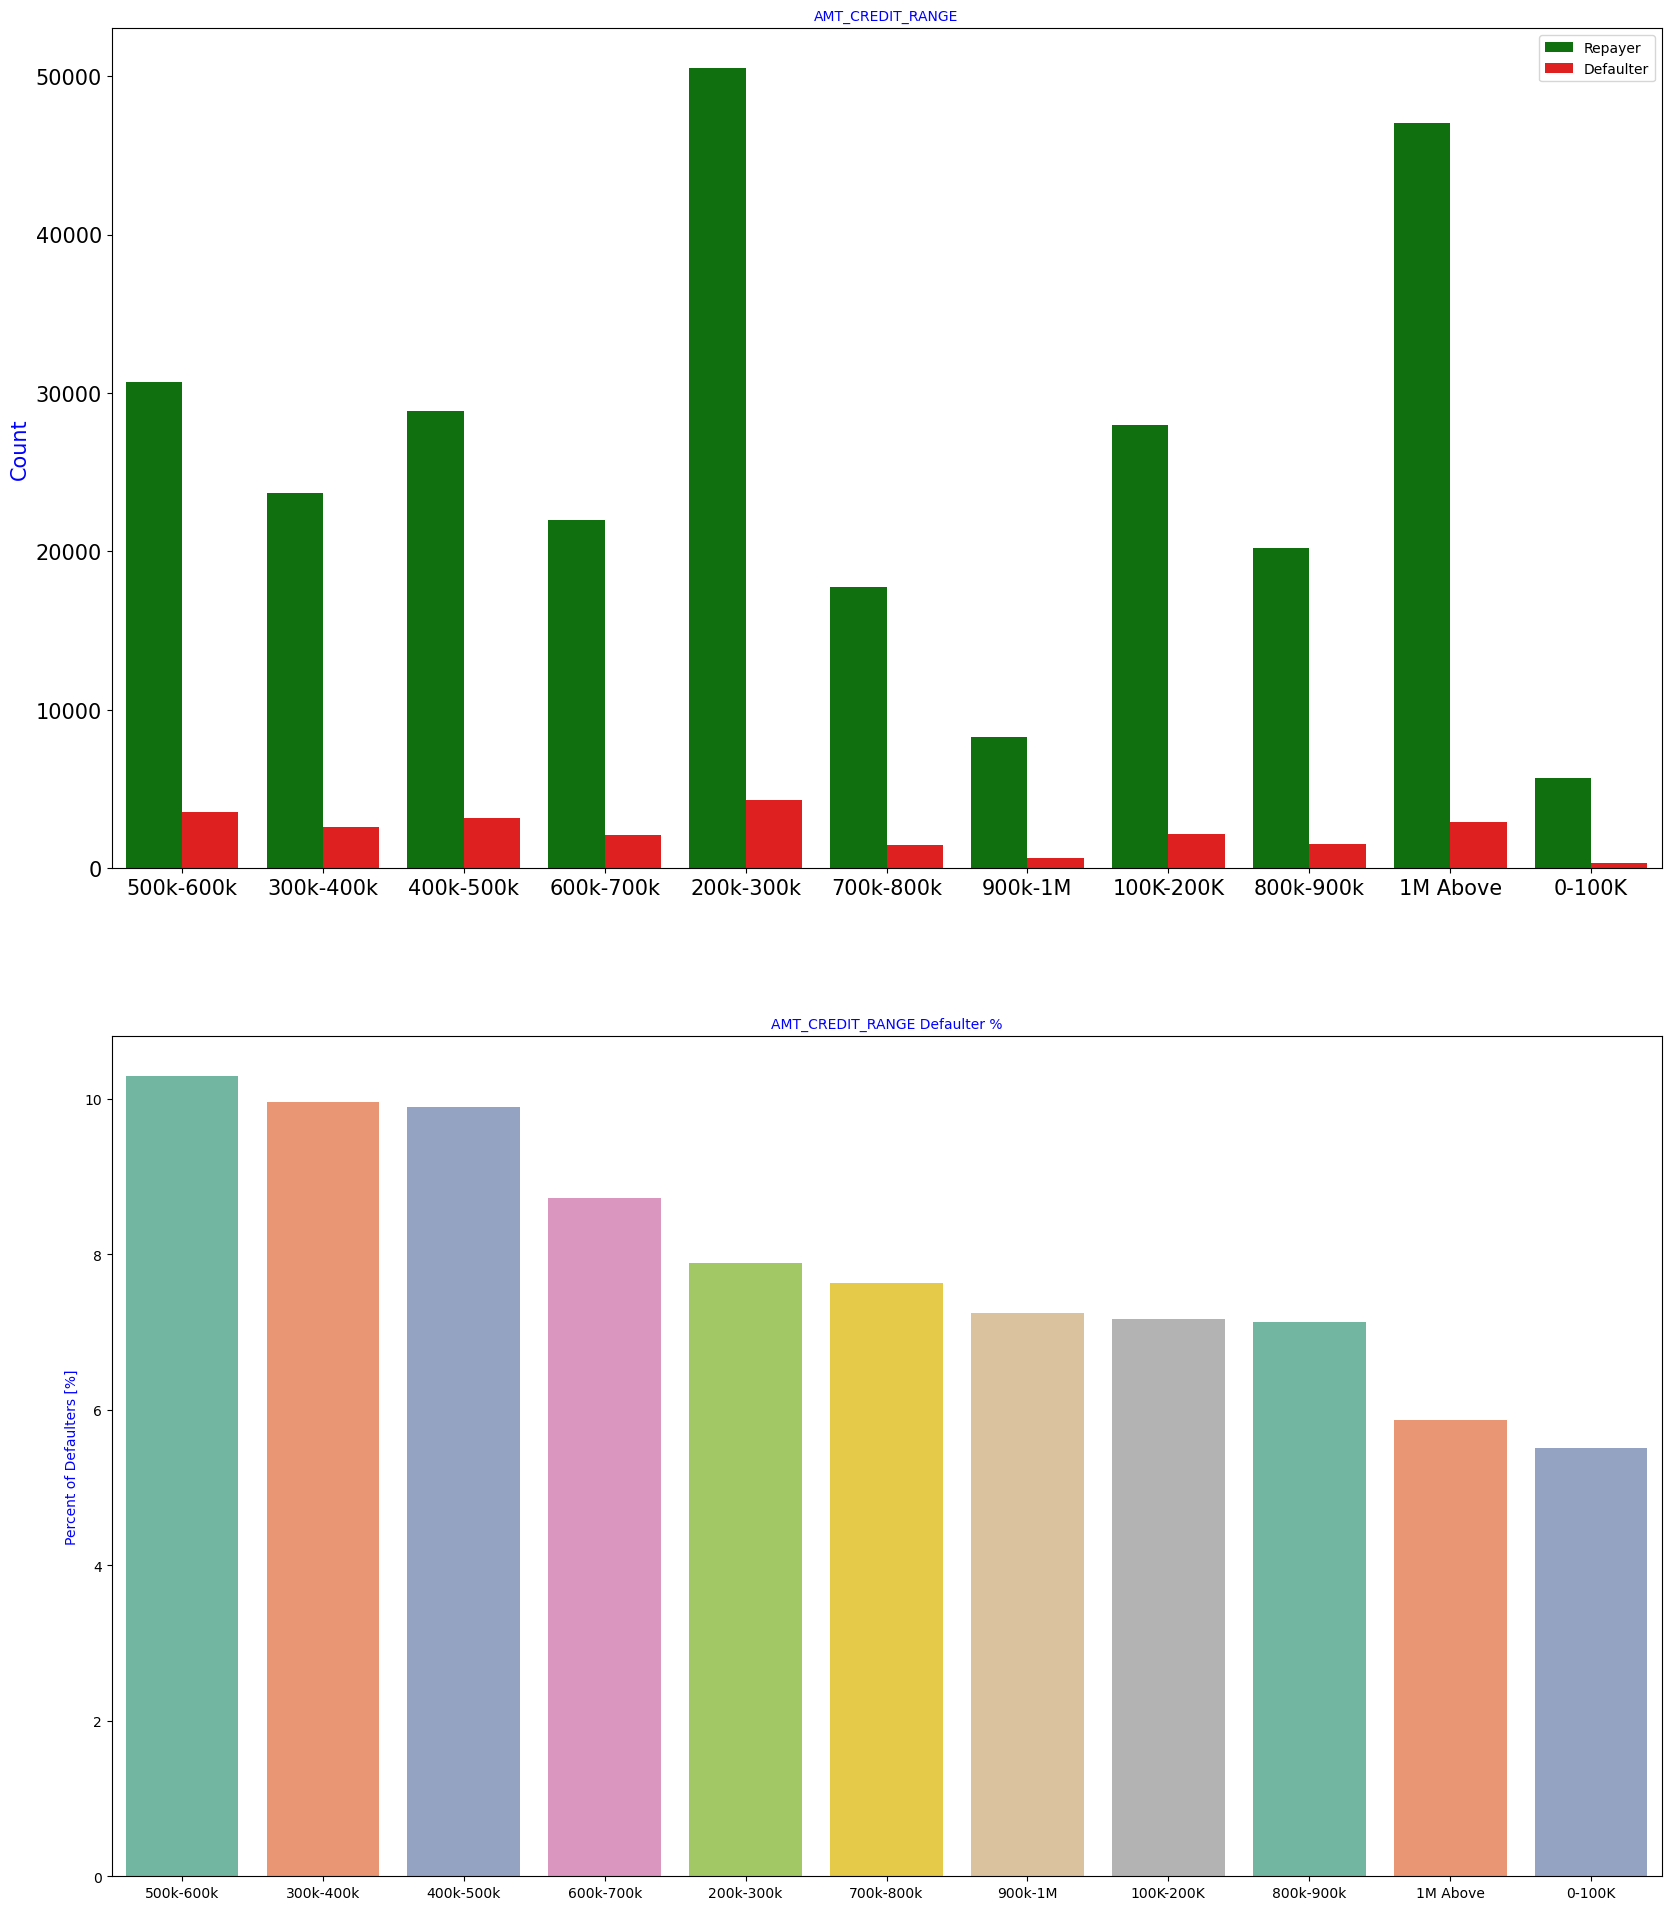

In [179]:
univariate_categorical("AMT_CREDIT_RANGE",False,False,False)

## AMT_INCOME_RANGE
### Distribution of Income of the Clients from the provided application dataset

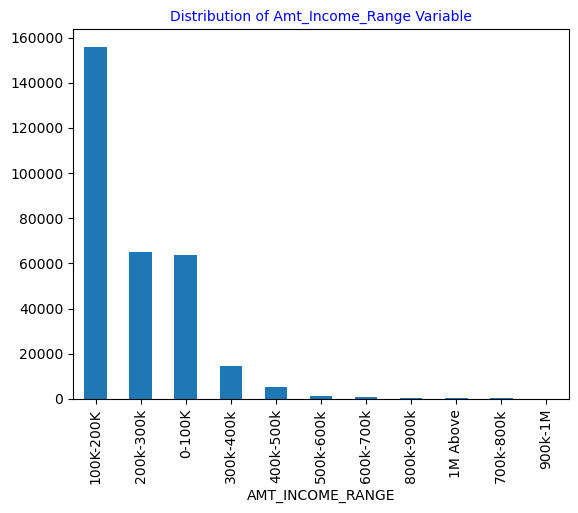

In [181]:
create_bar_plot("AMT_INCOME_RANGE",app_data_new)

### Analyzing Amount_Income Range based on loan repayment status
### Inferences:
- Majority of the applicants have salary between 100-200K
- Application with Income less than 300,000 has high probability of defaulting
- Applicant with Income between 700-800k are less likely to default

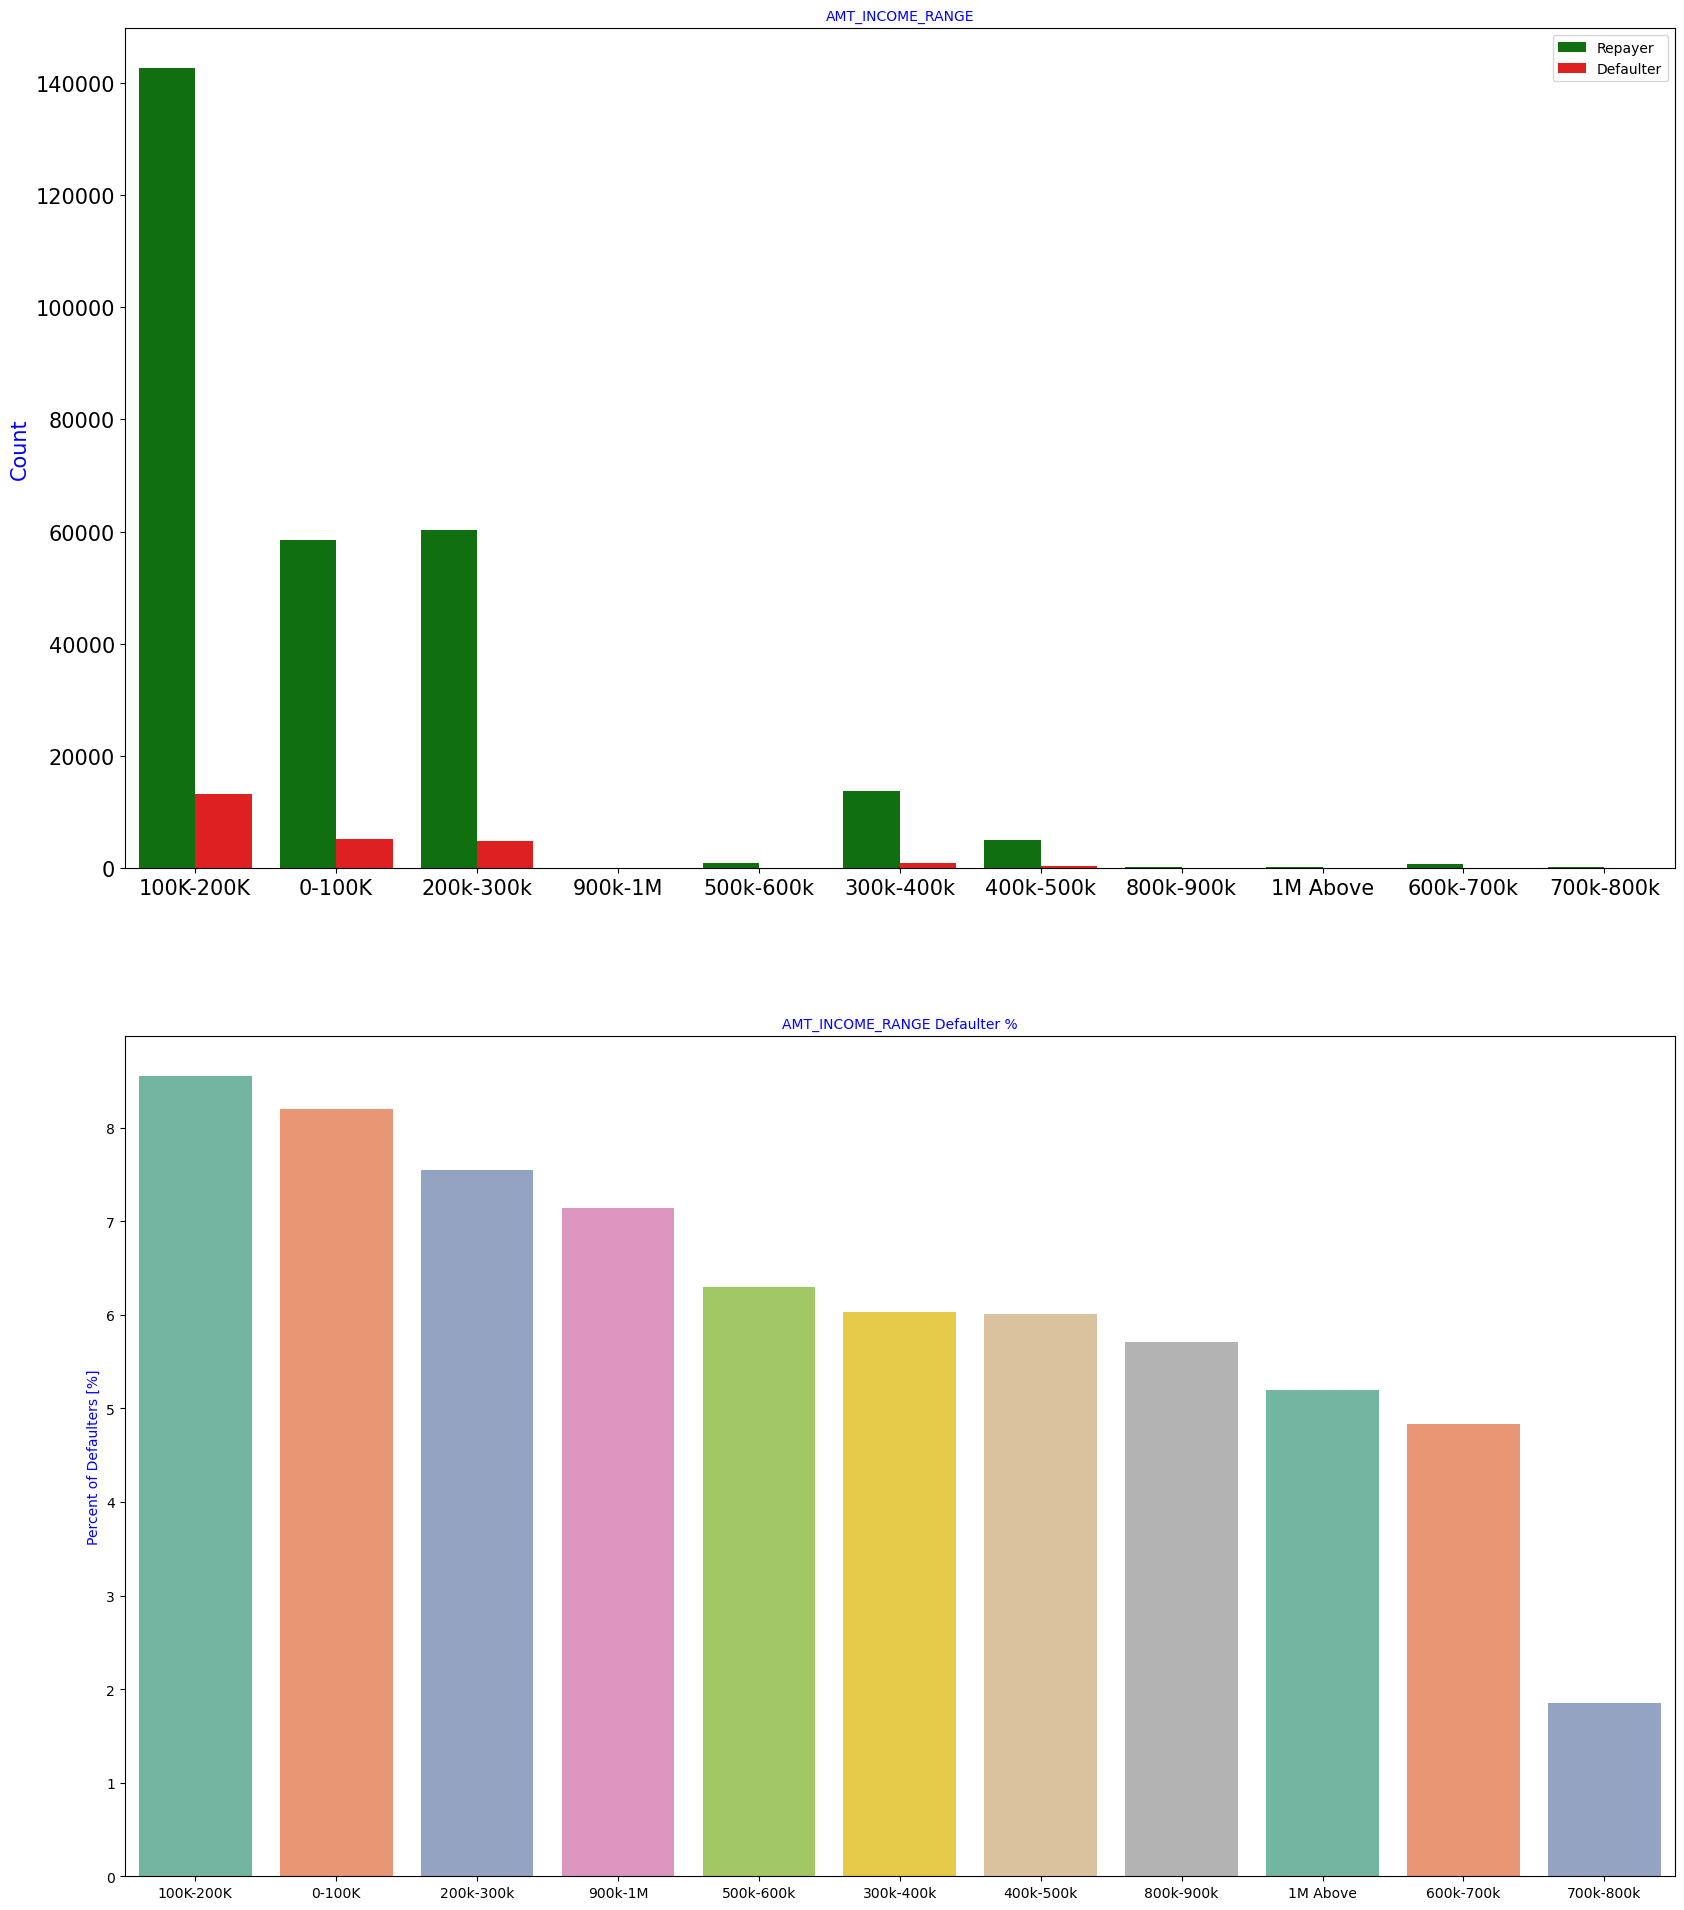

In [183]:
univariate_categorical("AMT_INCOME_RANGE",False,False,False)

## CNT_CHILDREN
### Distribution of No. of Children of the Clients from the provided application dataset

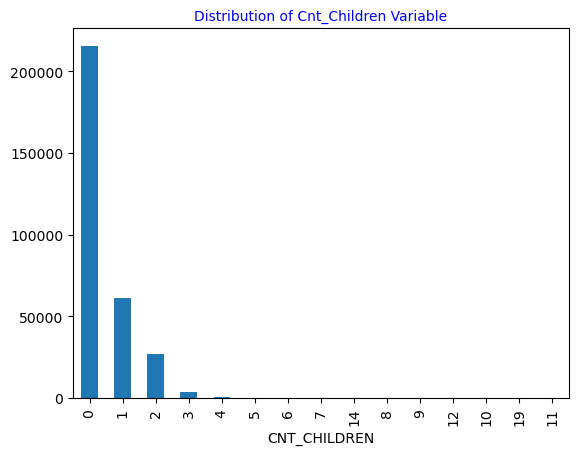

In [185]:
create_bar_plot("CNT_CHILDREN",app_data_new)

## Analyzing Number of children based on loan repayment status
### Inferences:
- ##### Most of the applicants do not have children. As applicants in this group are more the no. of defaulters are also more in this group
- ##### Very few clients have more than 3 children.
- ##### Client who have more than 4 children have a very high default rate with child count 9 and 11 showing 100% default rate

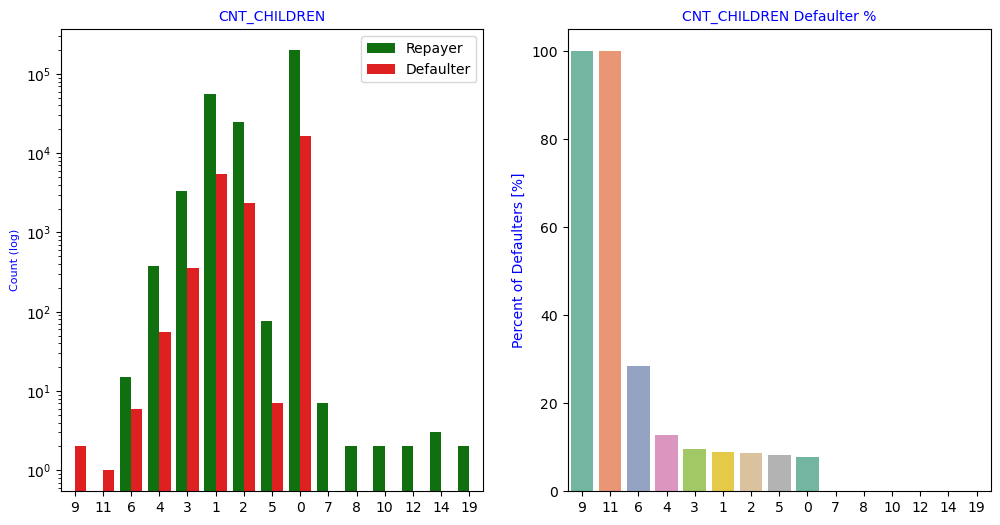

In [187]:
univariate_categorical("CNT_CHILDREN",True)

## CNT_FAM_MEMBERS
### Distribution of No. of family members of the Clients from the provided application dataset

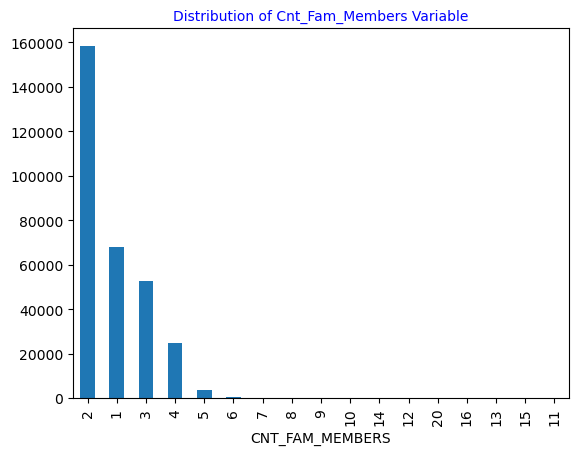

In [189]:
create_bar_plot("CNT_FAM_MEMBERS",app_data_new)

## Analyzing Number of family members based on loan repayment status
### Inferences:
- #####  Family member follows the same trend as children where having more family members increases the risk of defaulting

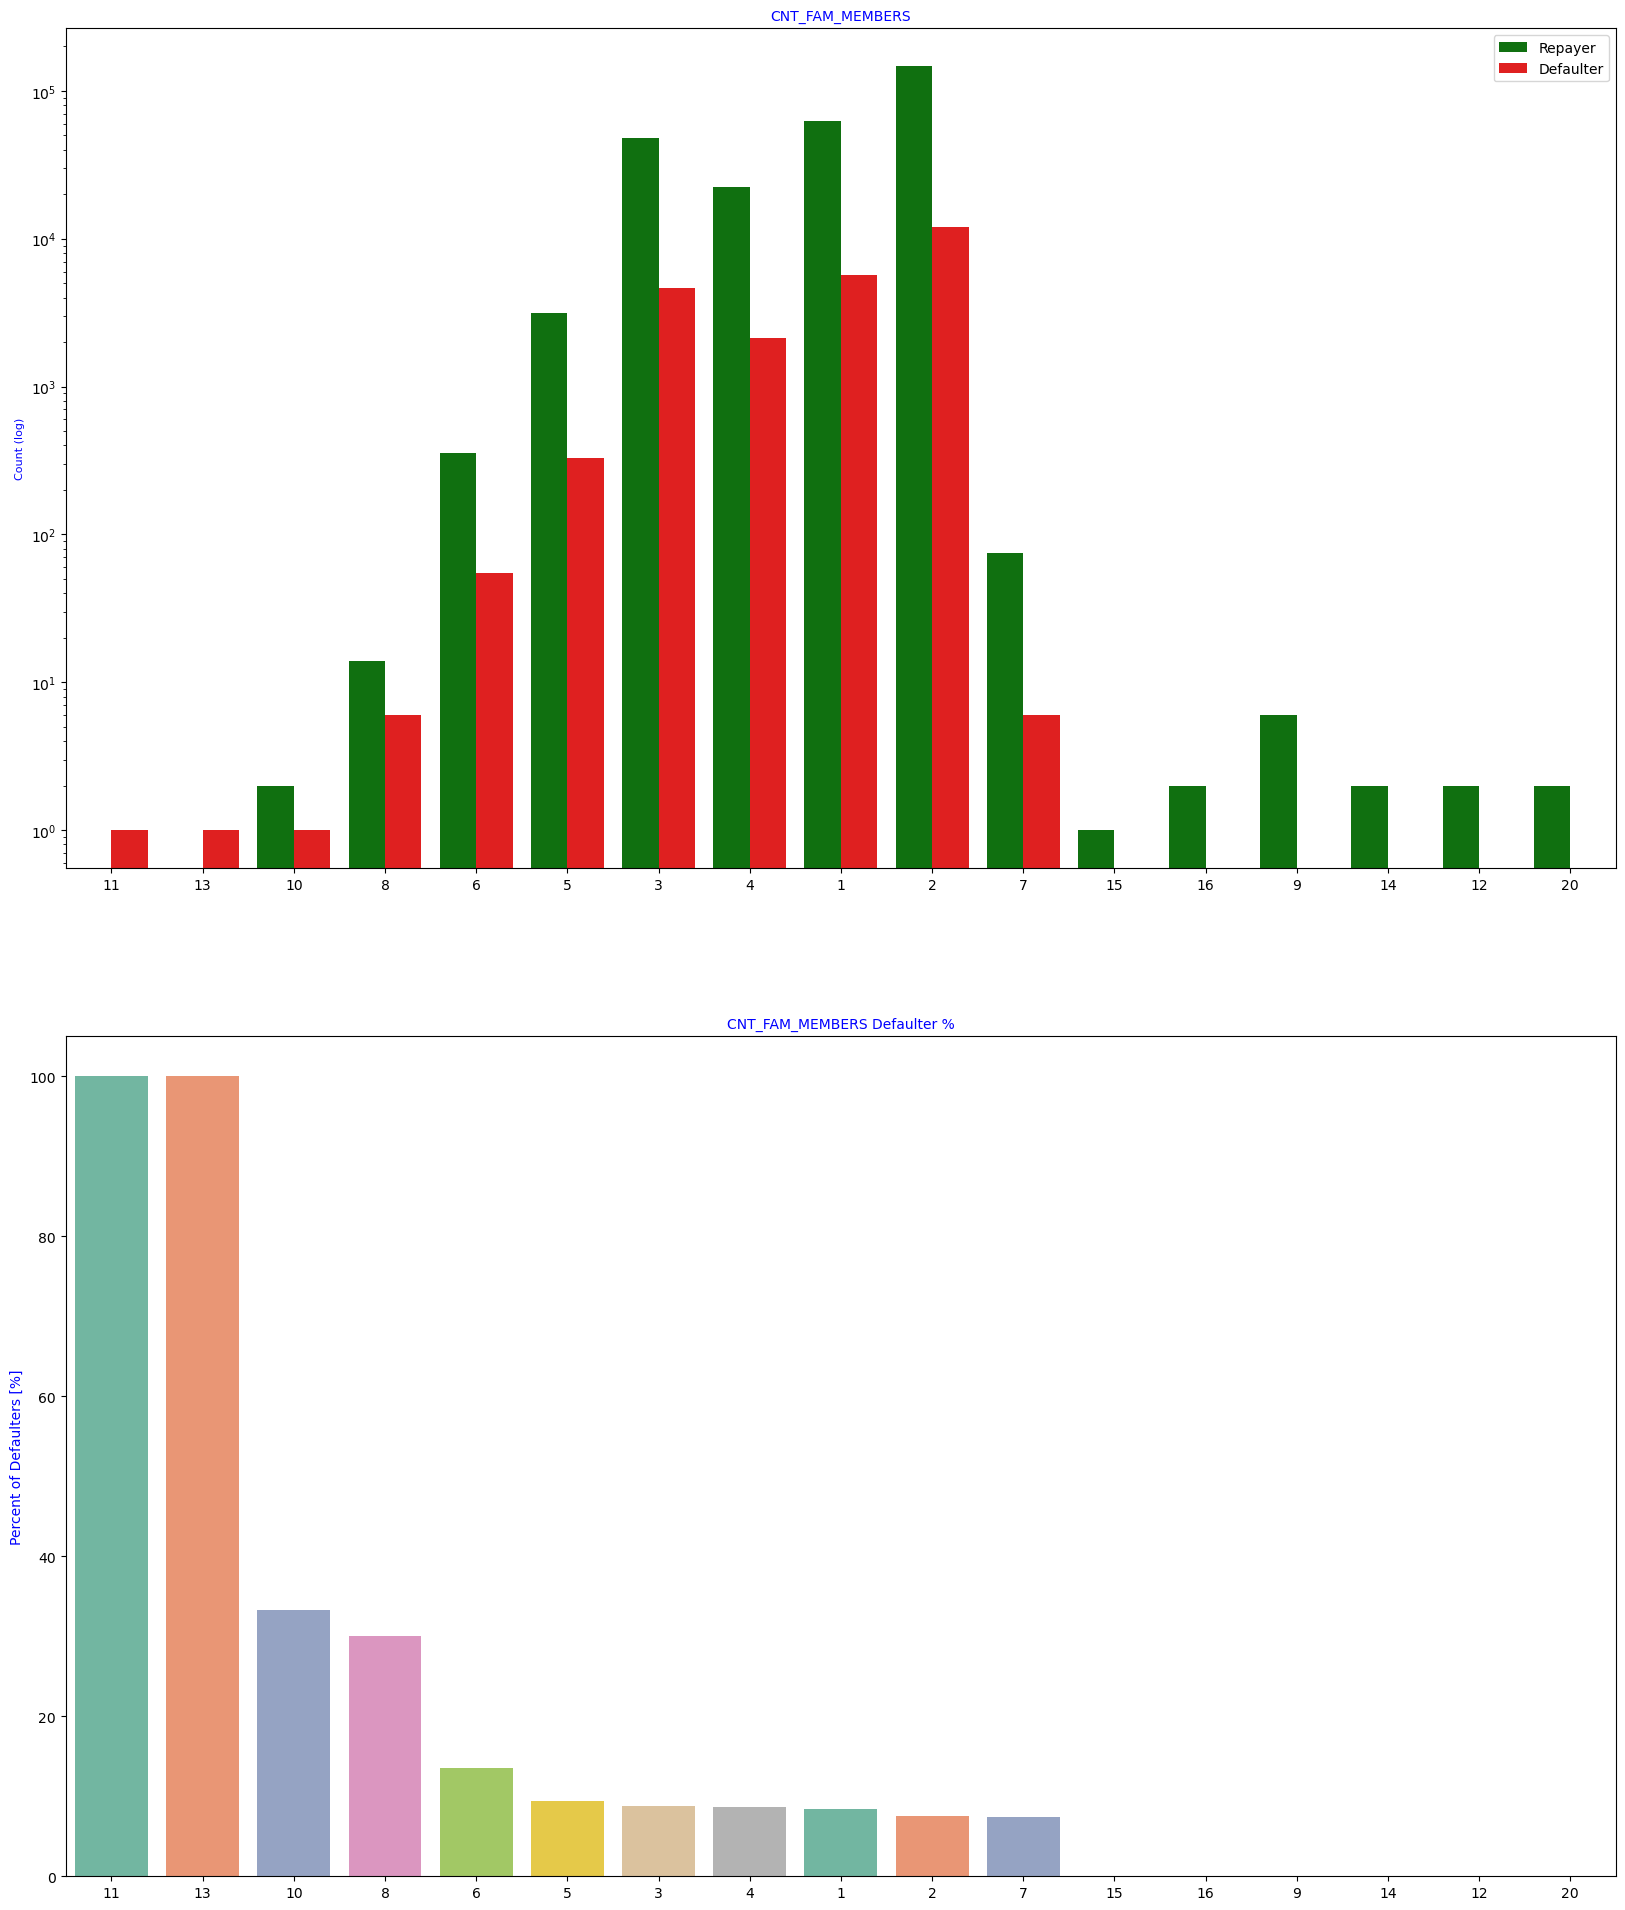

In [191]:
univariate_categorical("CNT_FAM_MEMBERS",True, False, False)

## Categorical Bi/Multivariate Analysis
#### Data view of NAME_INCOME_TYPE Vs AMT_INCOME_TOTAL

In [193]:
app_data_new.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Businessman,10.00000,6.52500,6.27226,1.80000,2.25000,4.95000,8.43750,22.50000
Commercial associate,71617.00000,2.02955,1.47974,0.26550,1.35000,1.80000,2.25000,180.00090
Maternity leave,5.00000,1.40400,1.26857,0.49500,0.67500,0.90000,1.35000,3.60000
Pensioner,55362.00000,1.36401,0.76650,0.25650,0.90000,1.17000,1.66500,22.50000
State servant,21703.00000,1.79738,1.00881,0.27000,1.12500,1.57500,2.25000,31.50000
Student,18.00000,1.70500,1.06645,0.81000,1.12500,1.57500,1.78875,5.62500
Unemployed,22.00000,1.10536,0.88055,0.26550,0.54000,0.78750,1.35000,3.37500
Working,158774.00000,1.63170,3.07578,0.25650,1.12500,1.35000,2.02500,1170.00000


### Income type vs Income Amount Range

In [195]:
def bivariate_bar(x,y,df,hue,figsize):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,
                  y=y,
                  data=df, 
                  hue=hue, 
                  palette =['g','r'])     
        
    plt.xlabel(x,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.ylabel(y,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.title(col, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.xticks(rotation=90, ha='right')
    plt.legend(labels = ['Repayer','Defaulter'])
    plt.show()

## INFERENCES:  
- #### It can be seen that business man's income is the highest and the estimated range with default 95% confidence level seem to indicate that the income of a business man could be in the range of slightly close to 4 lakhs and slightly above 10 lakhs

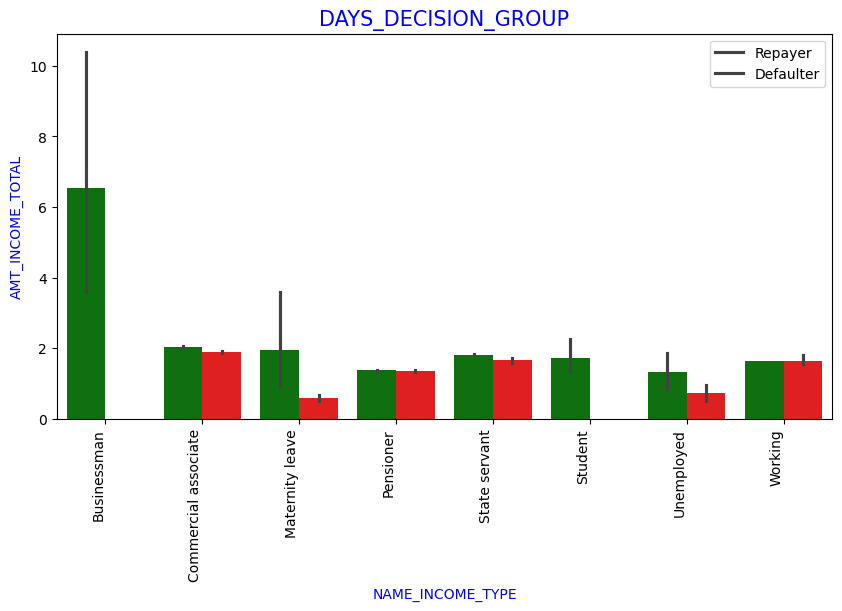

In [197]:
bivariate_bar("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",app_data_new,"TARGET",(10,5))

## Plotting pairplot between amount variable

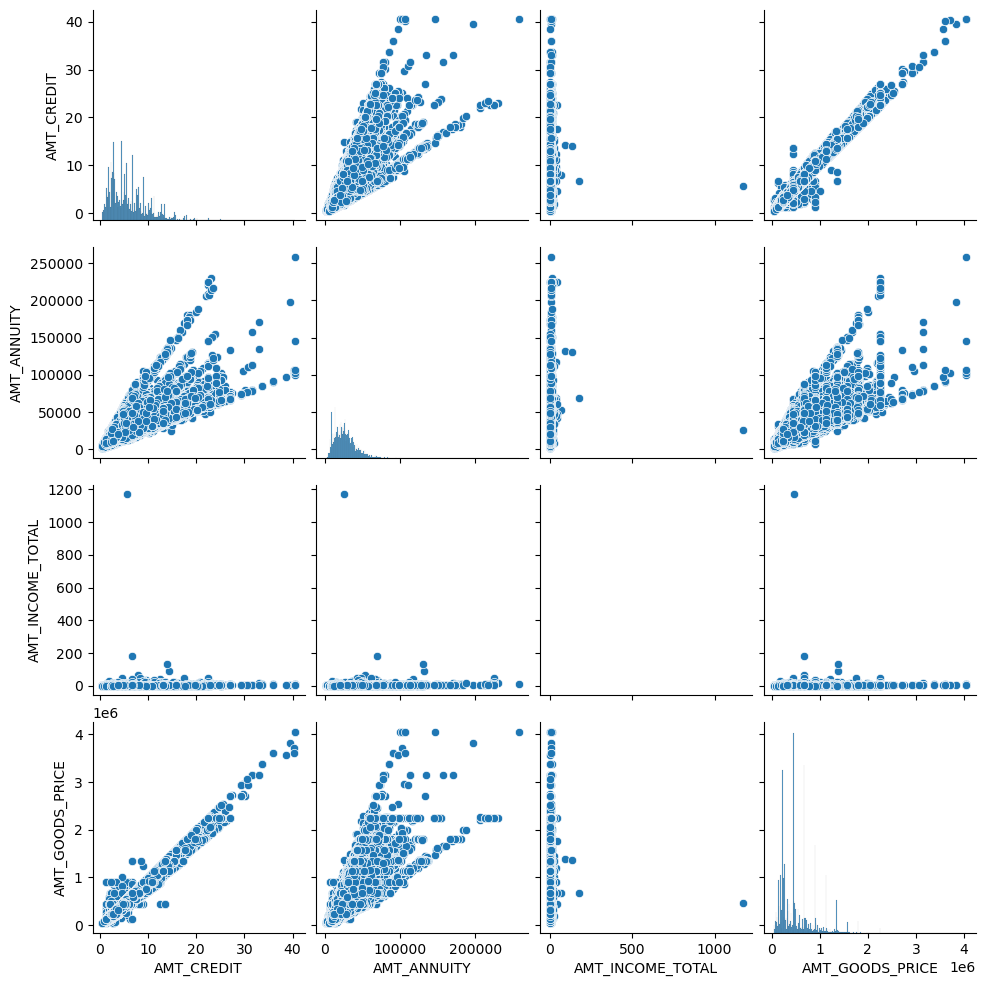

In [199]:
sns.pairplot(app_data_new[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE']])
plt.show()

### Correlation between variables
## INFERENCES:
- #### Very high correlation between AMT_CREDIT and AMT_GOODS_PRICE -  Applicants owning goods of high value can take loans of higher amounts.

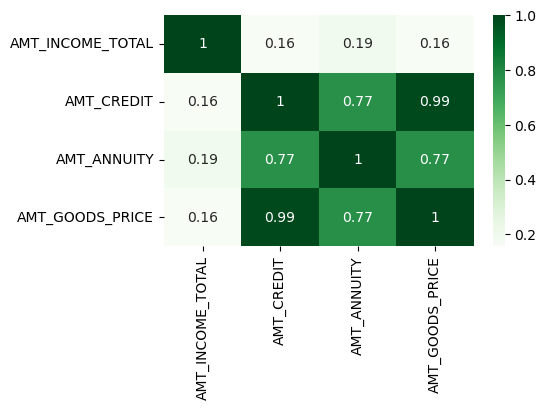

In [201]:
plt.figure(figsize=[5,3])
sns.heatmap(app_data_new[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']].corr(),
            annot=True, cmap ="Greens")
plt.show()

# Numeric Variables Analysis

### Bifurcating the application_data dataframe based on Target value 0 and 1 for correlation and other analysis

In [204]:
app_data_new.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [205]:
app_data_new.dtypes


SK_ID_CURR                 int64
TARGET                     int64
NAME_CONTRACT_TYPE      category
CODE_GENDER             category
FLAG_OWN_CAR            category
                          ...   
AMT_CREDIT_RANGE        category
AGE                        int64
AGE_GROUP               category
YEARS_EMPLOYED             int64
YEARS_EMPLOYED_RANGE    category
Length: 79, dtype: object

In [206]:
# Bifurcating the application_data dataframe based on Target value 0 and 1 for correlation and other analysis
cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


Repayer_df = app_data_new.loc[app_data_new['TARGET']==0, cols_for_correlation] # Repayers
Defaulter_df = app_data_new.loc[app_data_new['TARGET']==1, cols_for_correlation] # Defaulters

### Correlation between numeric variable
- #### Getting the top 10 correlation for the Repayers data

In [208]:
numeric_df = Repayer_df.select_dtypes(include=[np.number])
corr_repayer = numeric_df.corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(bool))
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

,VAR1,VAR2,Correlation
94,AMT_GOODS_PRICE,AMT_CREDIT,0.98702
230,CNT_FAM_MEMBERS,CNT_CHILDREN,0.87857
95,AMT_GOODS_PRICE,AMT_ANNUITY,0.77642
71,AMT_ANNUITY,AMT_CREDIT,0.77130
167,DAYS_EMPLOYED,DAYS_BIRTH,0.62611
70,AMT_ANNUITY,AMT_INCOME_TOTAL,0.41895
93,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.34943
47,AMT_CREDIT,AMT_INCOME_TOTAL,0.34280
138,DAYS_BIRTH,CNT_CHILDREN,0.33697
190,DAYS_REGISTRATION,DAYS_BIRTH,0.33315


# INFERENCES:
### Correlating factors amongst repayers:

### Credit amount is highly correlated with
- amount of goods price
- loan annuity
- total income
- We can also see that repayers have high correlation in number of days employed.

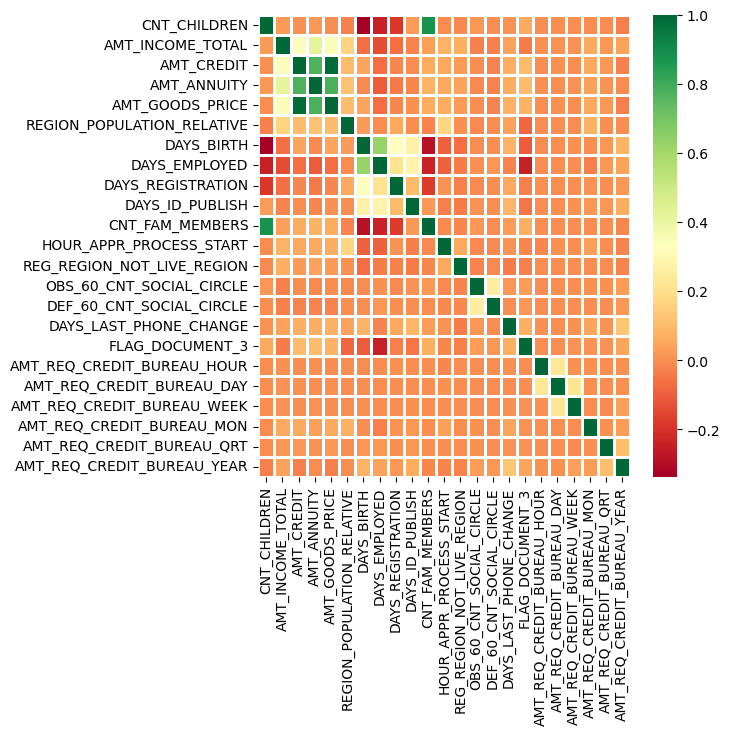

In [210]:
numeric_df = Repayer_df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
fig = plt.figure(figsize=(6,6))
ax = sns.heatmap(corr_matrix, cmap="RdYlGn",annot=False,linewidth =1)

## Getting the top 10 correlation for the Defaulter data

In [212]:
numeric_defaulter_df = Defaulter_df.select_dtypes(include=[np.number])
corr_Defaulter = numeric_defaulter_df.corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(bool))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter["Correlation"]=corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head(10)

,VAR1,VAR2,Correlation
94,AMT_GOODS_PRICE,AMT_CREDIT,0.98278
230,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88548
95,AMT_GOODS_PRICE,AMT_ANNUITY,0.75230
71,AMT_ANNUITY,AMT_CREDIT,0.75219
167,DAYS_EMPLOYED,DAYS_BIRTH,0.58219
190,DAYS_REGISTRATION,DAYS_BIRTH,0.28911
375,FLAG_DOCUMENT_3,DAYS_EMPLOYED,0.27217
335,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.26436
138,DAYS_BIRTH,CNT_CHILDREN,0.25911
213,DAYS_ID_PUBLISH,DAYS_BIRTH,0.25286


## INFERENCES:

- #### Credit amount is highly correlated with amount of goods price which is same as repayers.
- #### But the loan annuity correlation with credit amount has slightly reduced in defaulters(0.75) when compared to repayers(0.77)
- #### We can also see that repayers have high correlation in number of days employed(0.62) when compared to defaulters(0.58).
- #### There is a severe drop in the correlation between total income of the client and the credit amount(0.038) amongst defaulters whereas it is 0.342 among repayers.
- #### Days_birth and number of children correlation has reduced to 0.259 in defaulters when compared to 0.337 in repayers.
- #### There is a slight increase in defaulted to observed count in social circle among defaulters(0.264) when compared to repayers(0.254)

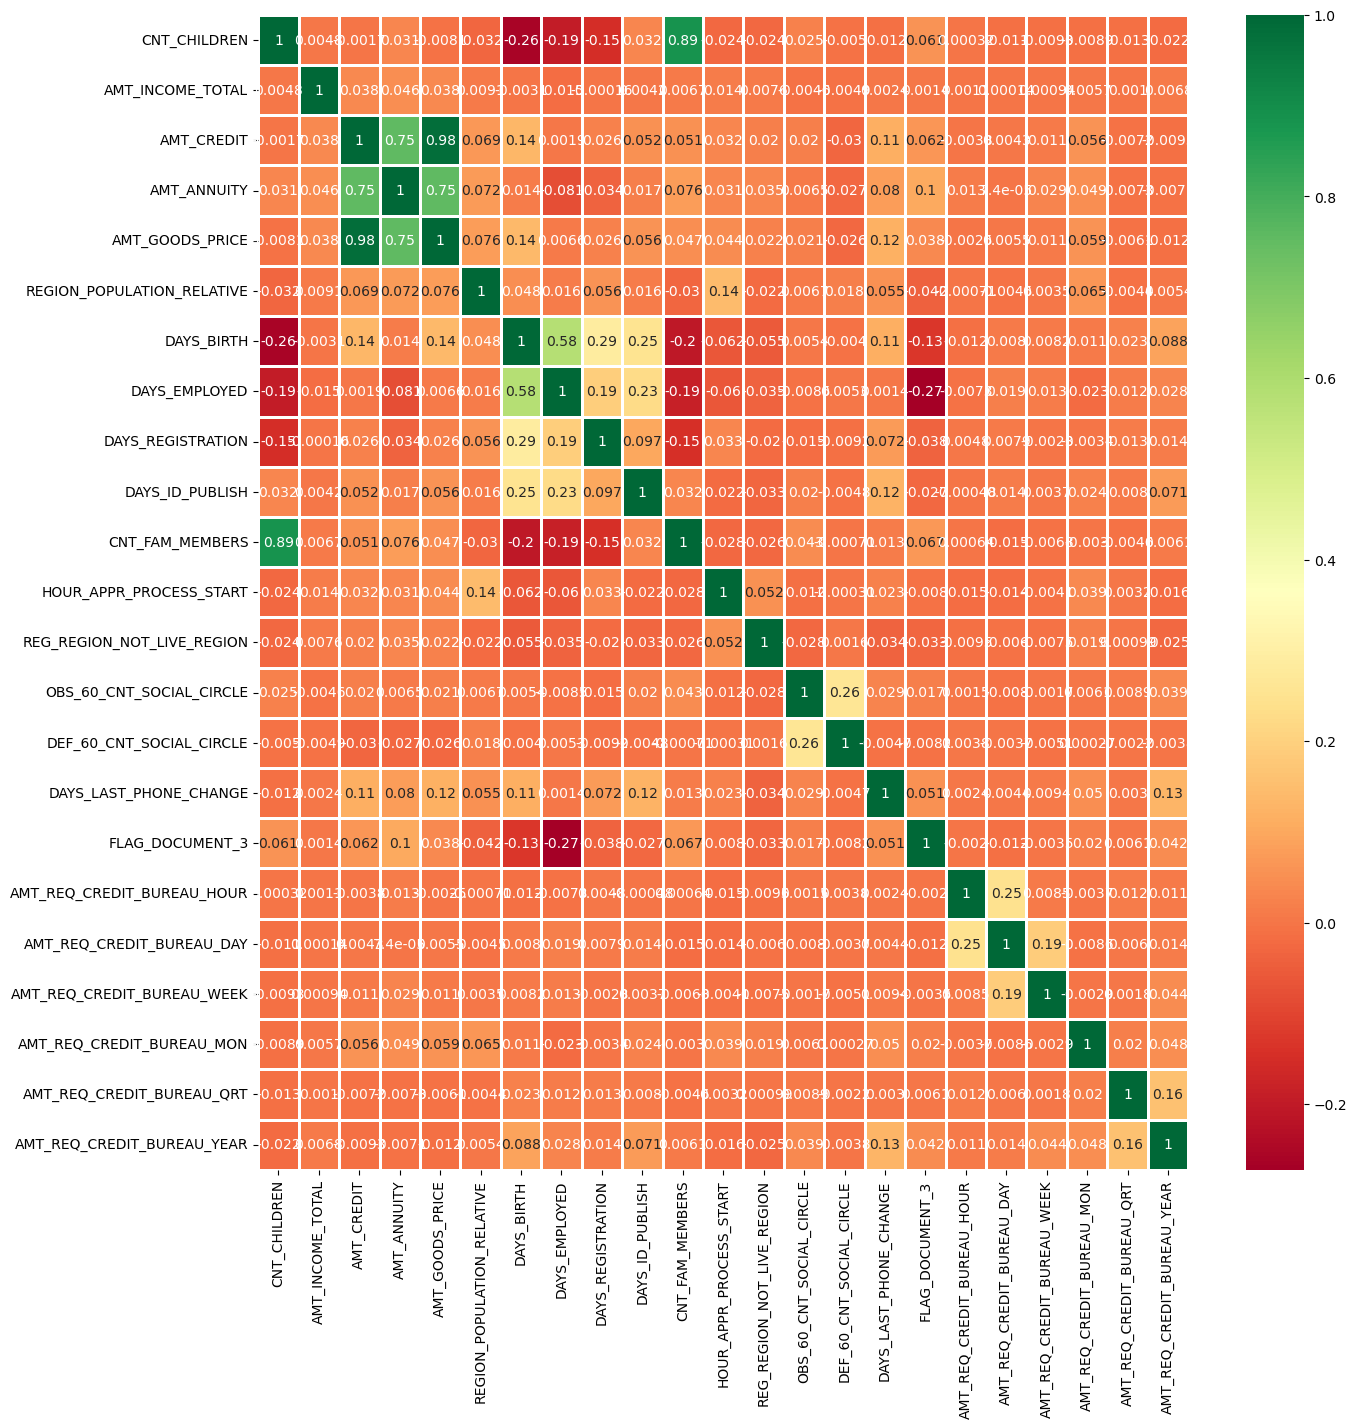

In [214]:
numeric_defaulter_df = Defaulter_df.select_dtypes(include=[np.number])
corr_Defaulter = numeric_defaulter_df.corr()
fig = plt.figure(figsize=(15,15))
ax = sns.heatmap(corr_Defaulter, cmap="RdYlGn",annot=True,linewidth =1)

## Merged Dataframes Analysis
#### merge both the dataframe on SK_ID_CURR with Inner Joins

In [226]:
merged_df = pd.merge(app_data_new, prev_app_new, how='inner', on='SK_ID_CURR')
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_DECISION_GROUP
0,100002,1,Cash loans,M,N,Y,0,2.02500,4.06597,24700.50000,...,Vehicles,POS,XNA,Stone,500,Auto technology,24.00000,low_normal,POS other with interest,400-800
1,100003,0,Cash loans,F,N,N,0,2.70000,12.93502,35698.50000,...,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00000,low_normal,Cash X-Sell: low,400-800
2,100003,0,Cash loans,F,N,N,0,2.70000,12.93502,35698.50000,...,Furniture,POS,XNA,Stone,1400,Furniture,6.00000,middle,POS industry with interest,800-1200
3,100003,0,Cash loans,F,N,N,0,2.70000,12.93502,35698.50000,...,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.00000,middle,POS household with interest,2000-2400
4,100004,0,Revolving loans,M,Y,Y,0,0.67500,1.35000,6750.00000,...,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.00000,middle,POS mobile without interest,800-1200


### Checking the details of the merged dataframe

In [229]:
print("Number of Rows and Columns in previous_application file:",merged_df.shape)

Number of Rows and Columns in previous_application file: (1413701, 105)


In [231]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Columns: 105 entries, SK_ID_CURR to DAYS_DECISION_GROUP
dtypes: category(39), float64(24), int64(42)
memory usage: 764.4 MB


In [233]:
merged_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1413701.00000,1413701.00000,1413701.00000,1413701.00000,1413701.00000,1413701.00000,1413701.00000,1413701.00000,1413701.00000,1413701.00000,...,1413701.00000,1413701.00000,1413701.00000,1413700.00000,1413701.00000,1413701.00000,1413701.00000,1413701.00000,1413701.00000,1413701.00000
mean,278481.28751,0.08655,0.40489,1.73316,5.87554,27016.87647,527652.18260,0.02075,16321.05222,72663.47482,...,1922744.33061,14840.32226,175243.59371,196354.08612,185439.55453,12.47893,0.99643,880.36704,314.98781,12.56367
std,102811.78804,0.28118,0.71735,1.98573,3.84917,13950.71644,353102.83820,0.01335,4344.55709,143337.36099,...,532715.33525,13163.70435,293622.19314,319481.25072,288124.36826,3.33147,0.05963,783.54017,7695.08166,14.48807
min,100002.00000,0.00000,0.00000,0.25650,0.45000,1615.50000,40500.00000,0.00029,7489.00000,0.00000,...,1000001.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,-1.00000,0.00000
25%,189364.00000,0.00000,0.00000,1.12500,2.70000,16821.00000,238500.00000,0.01003,12739.00000,1042.00000,...,1461346.00000,7406.05500,19750.50000,24880.50000,45000.00000,10.00000,1.00000,271.00000,-1.00000,0.00000
50%,278992.00000,0.00000,0.00000,1.57500,5.08495,24925.50000,450000.00000,0.01885,16044.00000,2401.00000,...,1922698.00000,11250.00000,70870.50000,80595.00000,70875.00000,12.00000,1.00000,582.00000,4.00000,10.00000
75%,367556.00000,0.00000,1.00000,2.07000,8.07984,34542.00000,679500.00000,0.02866,19980.00000,6313.00000,...,2384012.00000,16747.96500,180000.00000,215640.00000,180000.00000,15.00000,1.00000,1313.00000,85.00000,18.00000
max,456255.00000,1.00000,19.00000,1170.00000,40.50000,225000.00000,4050000.00000,0.07251,25201.00000,365243.00000,...,2845381.00000,418058.14500,5850000.00000,4509688.50000,5850000.00000,23.00000,1.00000,2922.00000,4000000.00000,84.00000


In [235]:
# Bifurcating the application_data dataframe based on Target value 0 and 1 for correlation and other analysis

T0 = merged_df[merged_df['TARGET']==0] # Repayers
T1 = merged_df[merged_df['TARGET']==1] # Defaulters

## Plotting Contract Status vs purpose of the loan:

In [240]:
def univariate_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, 
                  data=df,
                  hue= hue,
                  palette= palette,
                  order=df[col].value_counts().index)
    

    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})     
    else:
        plt.ylabel("Count",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})       

    plt.title(col , fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=90, ha='right')
    
    plt.show()

##  Inferences:

 - Loan purpose has high number of unknown values (XAP, XNA)
 - Loan taken for the purpose of Repairs seems to have highest default rate
 - A very high number application have been rejected by bank or refused by client which has purpose as "repair or other". This shows that purpose "repair" is considered as high risk by bank and either they are rejected or bank offered very high loan interest rate which is not feasible by the clients, thus they refuse the loan.
   

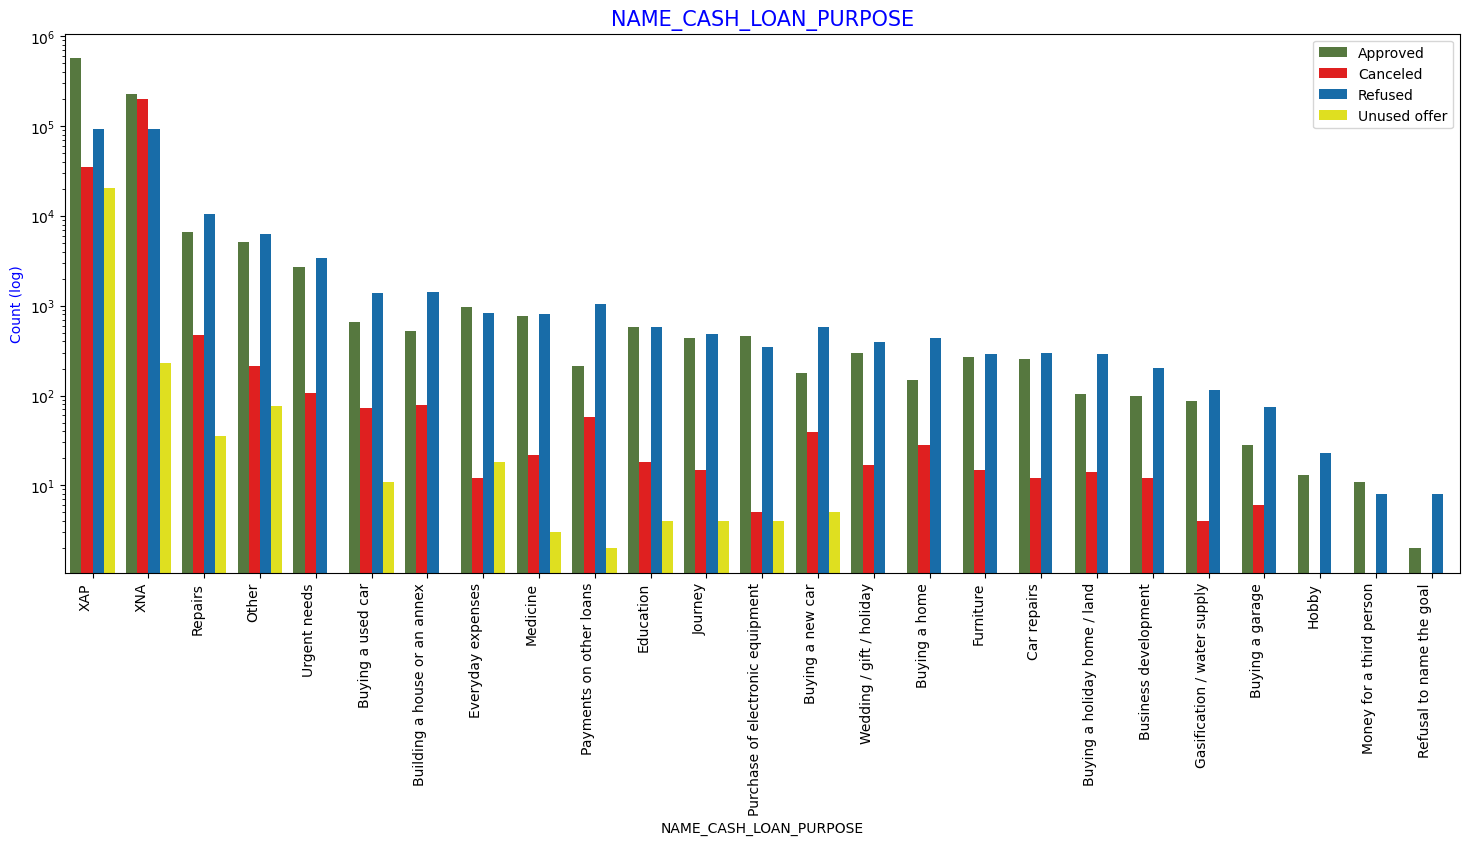

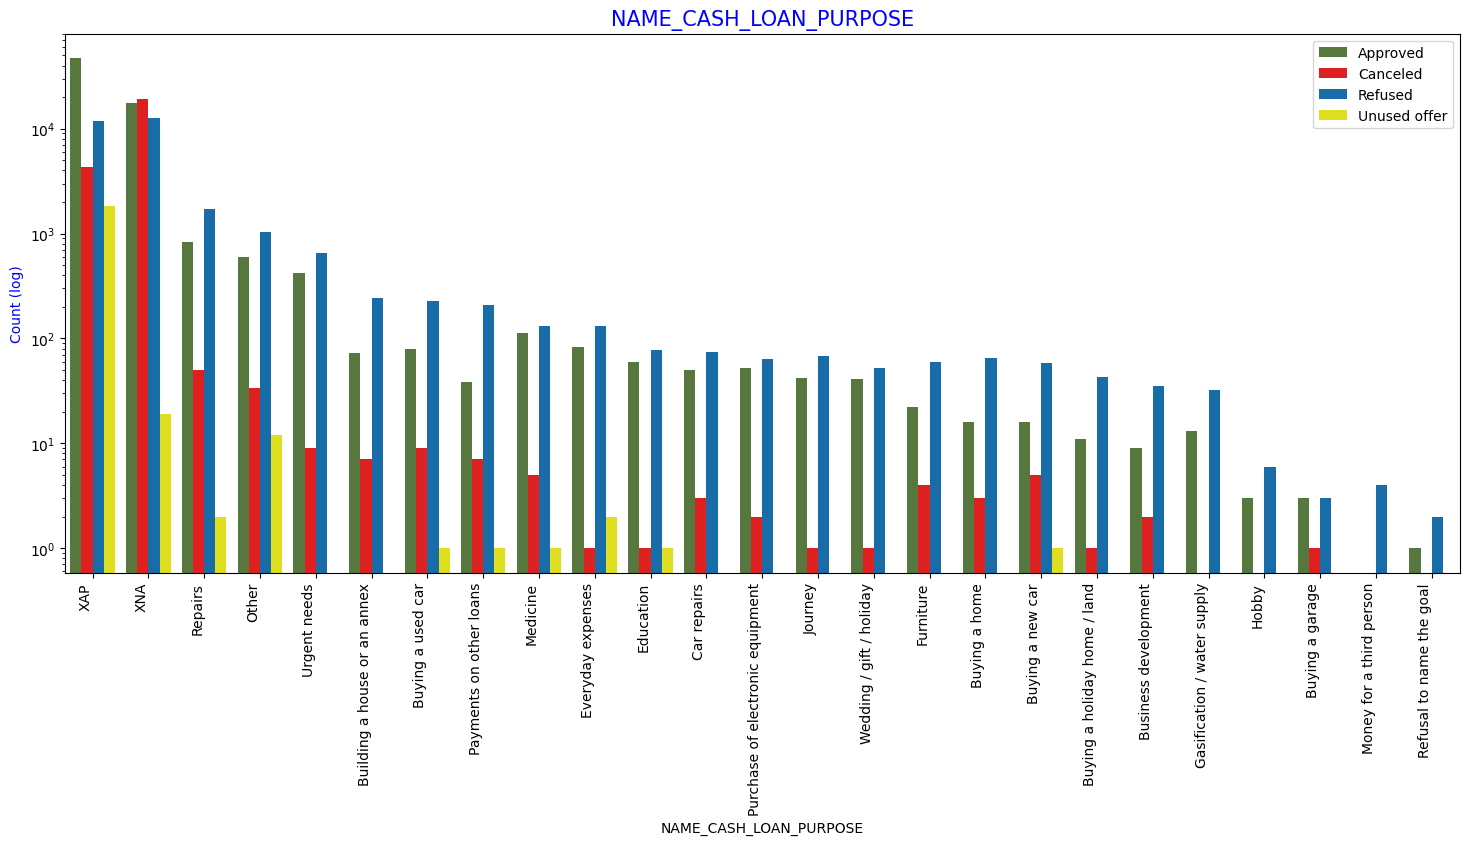

In [242]:
univariate_merged("NAME_CASH_LOAN_PURPOSE",T0,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

univariate_merged("NAME_CASH_LOAN_PURPOSE",T1,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

#### Checking the Contract Status based on loan repayment status and whether there is any business loss or financial loss
### INFERENCES:

- 90% of the previously cancelled client have actually repayed the loan. Revisiting the interest rates would increase business opoortunity for these clients</li>
- 88% of the clients who have been previously refused a loan has payed back the loan in current case.
- Refual reason should be recorded for further analysis as these clients would turn into potential repaying customer. 

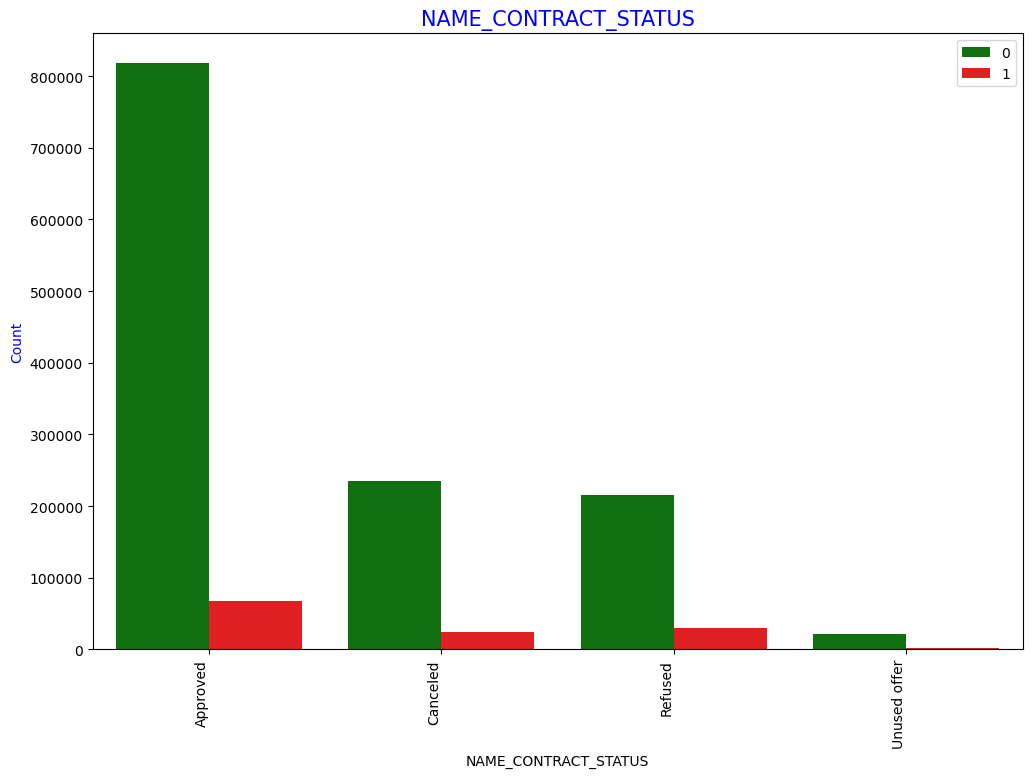

                             Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       818856     92.41%
                     1        67243      7.59%
Canceled             0       235641     90.83%
                     1        23800      9.17%
Refused              0       215952      88.0%
                     1        29438      12.0%
Unused offer         0        20892     91.75%
                     1         1879      8.25%


In [248]:
univariate_merged("NAME_CONTRACT_STATUS",merged_df,"TARGET",['g','r'],False,(12,8))
g = merged_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([g.value_counts(),round(g.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
print (df1)

### Suggestions:
- 90% of the previously cancelled client have actually repayed the loan. Recording the reason for cancellation which might help the bank to determine and negotiate terms with these repaying customers in future for increase business opportunity.
- 88% of the clients who were refused by bank for loan earlier have now turned into a repaying client. Hence documenting the reason for rejection could mitigate the business loss and these clients could be contacted for further loans.

## CONCLUSION

### After analysing the datasets, there are few attributes of a client with which the bank would be able to 
### identify if they will repay the loan or not. All the Detailed Analysis are done in Power Point Presentation.
